# Unsupervised Large-scale Energy Anomaly Detection


Foot notes for dataframe

df - complete dataset with anomaly column

X - preprocessed dataset (Sampled, no anomaly column,one-hot encoded, features extracted)

y - anomaly

X1 - imputed 1

X2 - imputed 2

X3 - imputed 3

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('energy_data.csv')

# **1. Descriptive Analysis**

This data set records the metered building energy usage in the following areas: chilled water, electric, hot water, and steam meters.

With better estimates of these energy-saving investments, large scale investors and financial institutions will be more inclined to invest in this area to enable progress in building efficiencies.

In [ ]:
df.head()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,NaN,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,2016-01-01 00:00:00,NaN,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,2016-01-01 00:00:00,NaN,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,2016-01-01 00:00:00,NaN,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,2016-01-01 00:00:00,NaN,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


In [ ]:
df.shape

(1749494, 57)

The original dataset is with a total of 57 features and it is labeled.


#### Data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749494 entries, 0 to 1749493
Data columns (total 57 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   building_id                    int64  
 1   timestamp                      object 
 2   meter_reading                  float64
 3   anomaly                        int64  
 4   site_id                        int64  
 5   primary_use                    object 
 6   square_feet                    int64  
 7   year_built                     int64  
 8   floor_count                    int64  
 9   air_temperature                float64
 10  cloud_coverage                 int64  
 11  dew_temperature                float64
 12  precip_depth_1_hr              int64  
 13  sea_level_pressure             float64
 14  wind_direction                 int64  
 15  wind_speed                     float64
 16  air_temperature_mean_lag7      float64
 17  air_temperature_max_lag7       float64
 18  ai

In [ ]:
df.describe()

,building_id,meter_reading,anomaly,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
count,1.749494e+06,1.641841e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,...,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06
mean,7.908894e+02,1.799018e+02,2.131816e-02,7.819728e+00,1.065658e+05,1.925582e+02,1.002549e+00,1.650747e+01,1.169304e+02,8.809186e+00,...,4.116000e+00,4.116496e+00,4.116366e+00,4.115904e+00,4.315819e+00,4.205350e+00,4.261428e+00,4.315266e+00,4.315661e+00,4.314160e+00
std,4.118085e+02,3.959129e+02,1.444428e-01,4.830006e+00,1.025531e+05,8.934352e+01,2.237710e+00,1.032373e+01,1.263866e+02,9.871421e+00,...,1.243450e-14,1.172369e-01,7.456097e-02,4.426736e-02,1.360274e+00,3.888381e-01,6.918509e-01,1.380285e+00,1.365402e+00,1.367109e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.980000e+02,0.000000e+00,0.000000e+00,-2.990000e+01,0.000000e+00,-3.600000e+01,...,4.116000e+00,3.942000e+00,3.989000e+00,4.056000e+00,4.370000e-01,1.556000e+00,2.670000e+00,4.070000e-01,4.030000e-01,4.300000e-02
25%,3.450000e+02,3.000000e+01,0.000000e+00,3.000000e+00,3.182900e+04,8.200000e+01,0.000000e+00,9.100000e+00,0.000000e+00,2.000000e+00,...,4.116000e+00,4.009000e+00,4.012000e+00,4.078000e+00,3.537000e+00,4.211000e+00,4.090000e+00,3.522000e+00,3.539000e+00,3.536000e+00
50%,8.960000e+02,8.410000e+01,0.000000e+00,9.000000e+00,7.108800e+04,2.550000e+02,0.000000e+00,1.670000e+01,4.000000e+00,9.700000e+00,...,4.116000e+00,4.138000e+00,4.147000e+00,4.102000e+00,4.442000e+00,4.211000e+00,4.548000e+00,4.395000e+00,4.406000e+00,4.410000e+00
75%,1.147000e+03,1.990000e+02,0.000000e+00,1.300000e+01,1.383160e+05,2.550000e+02,0.000000e+00,2.440000e+01,2.550000e+02,1.670000e+01,...,4.116000e+00,4.244000e+00,4.173000e+00,4.162000e+00,5.238000e+00,4.489000e+00,4.662000e+00,5.270000e+00,5.238000e+00,5.262000e+00
max,1.353000e+03,6.596890e+03,1.000000e+00,1.500000e+01,4.843760e+05,2.550000e+02,1.200000e+01,4.720000e+01,2.550000e+02,2.610000e+01,...,4.116000e+00,4.265000e+00,4.176000e+00,4.186000e+00,8.424000e+00,4.891000e+00,7.270000e+00,8.576000e+00,8.493000e+00,8.458000e+00


#### To check if there is duplicate in the dataset

In [ ]:
duplicates = df[df.duplicated(keep=False)]
if duplicates.empty:
    print("No duplicates found in the dataset.")
else:
    print("Duplicated rows in the dataset:")
    print(duplicates)

No duplicates found in the dataset.


#### To list out the unique value

In [ ]:
unique_primary_use = df['primary_use'].unique()
unique_site_id = df['site_id'].unique()
unique_wind_direction = df['wind_direction'].unique()
unique_floor_count = df['floor_count'].unique()
unique_weekday = df['weekday'].unique()
unique_cloud_coverage = df['cloud_coverage'].unique()
unique_year_built = df['year_built'].unique()

print("\n\033[1mUnique values in year_built : \033[0m\n", ', '.join(map(str, unique_year_built)))
print("\n\033[1mUnique values in cloud_coverage : \033[0m\n", ', '.join(map(str, unique_cloud_coverage)))
print("\n\033[1mUnique values in floor_count : \033[0m\n", ', '.join(map(str, unique_floor_count)))
print("\n\033[1mUnique values in wind_direction : \033[0m\n", ', '.join(map(str, unique_wind_direction)))
print("\n\033[1mUnique values in primary_use : \033[0m\n", ', '.join(map(str, unique_primary_use)))
print("\n\033[1mUnique values in site_id : \033[0m\n", ', '.join(map(str, unique_site_id)))
print("\n\033[1mUnique values in weekday : \033[0m\n", ', '.join(map(str, unique_weekday)))
print("0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday")


Unique values in year_built : 
 104, 105, 68, 111, 100, 110, 74, 103, 13, 9, 255, 60, 107, 6, 67, 0, 19, 77, 114, 92, 57, 70, 64, 65, 82, 89, 66, 31, 30, 76, 45, 52

Unique values in cloud_coverage : 
 255, 0, 4, 8, 6, 2, 7, 5, 3, 9, 1

Unique values in floor_count : 
 0, 10, 5, 7, 6, 4, 8, 9, 12, 3, 2, 1

Unique values in wind_direction : 
 0, 240, 350, 65535, 270, 20, 280, 200, 300, 230, 50, 340, 260, 30, 190, 210, 170, 160, 310, 250, 290, 110, 320, 10, 130, 100, 150, 120, 90, 220, 80, 330, 60, 40, 140, 360, 180, 70, 174, 176, 84, 198, 196, 202

Unique values in primary_use : 
 Education, Office, Parking, Lodging/residential, Entertainment/public assembly, Public services, Manufacturing/industrial, Services, Other, Healthcare, Food sales and service, Religious worship

Unique values in site_id : 
 0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15

Unique values in weekday : 
 4, 5, 6, 0, 1, 2, 3
0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday


From here we understand that:
1. The metered buildings in the dataset are from 16 different sites
2. Each building have its own usage, this is useful for us to identify the pattern

In [ ]:
# Calculate the count and percentage of each unique value in the column
value_counts = df['anomaly'].value_counts()
value_percentages = (df['anomaly'].value_counts(normalize=True) * 100).round(2)

# Create a new DataFrame to store the results
distribution_df = pd.DataFrame({'Count': value_counts, 'Percentage (%)': value_percentages})

# Sort the DataFrame by count in descending order
distribution_df = distribution_df.reset_index().rename(columns={'index': 'Unique Value'}).sort_values(by='Count', ascending=False)

# Reset the index for the distribution DataFrame
distribution_df = distribution_df.reset_index(drop=True)

# Print or display the distribution
print("Distribution of", 'column_name', ":")
print(distribution_df)

Distribution of column_name :
   Unique Value    Count  Percentage (%)
0             0  1712198           97.87
1             1    37296            2.13


### To know the date range of the data set

In [ ]:
print("\033[1mDate range\033[0m\n")
print("Start:\t", df['timestamp'].min())
print("End:\t", df['timestamp'].max())

Date range

Start:	 2016-01-01 00:00:00
End:	 2016-12-31 23:00:00


### Features understanding:
1. building_id                     : Unique building id code
2. timestamp                       : When the measurement was taken
3. meter_reading                   : The target variable. Energy consumption in kWh .
4. site_id                         : Unique site code
5. primary_use                     : The main purpose of the metered building (Education, Office, Parking, Lodging/residential,                                                       Entertainment/public assembly, Public services,                                                       Manufacturing/industrial, Services, Other, Healthcare, Food                                           sales and service, Religious worship)
6. square_feet                     : Gross floor  area of the building in square feet
7. year_built                      : Year building was opened
8. floor_count                     : The number of floors in the building
9. air_temperature                 : The air temperature at the location in Degree Celsius (C)
10. cloud_coverage                 :  Portion of the sky covered in clouds, in oktas (0-                                          9, 255 indicates missing value)
11. dew_temperature                   : The dew point temperature in Degree Celsis (C)
12. precip_depth_1_hr                 : The amount of precipitation in the last hour in millimeter (mm)
13. sea_level_pressure                : The atmospheric pressure at sea level in millibar/hectopascals
14. wind_direction                    :  Compass  direction from which the wind is blowing (0-360)
15. wind_speed                        : The speed of the wind in meters per second (m/s)
16. air_temperature_mean_lag7         : The mean air temperature over the past 7 hours
17. air_temperature_max_lag7          : The maximum air temperature over the past 7 hours
18. air_temperature_min_lag7          : The minimunm air temperature over the past 7 hours
19. air_temperature_std_lag7          : The standard deviation air temperature over the past 7 hours
20. air_temperature_mean_lag73        : The mean air temperature over the past 73 hours
21. air_temperature_max_lag73         : The maximum air temperature over the past 73 hours
22. air_temperature_min_lag73         : The minimunm air temperature over the past 73 hours
23. air_temperature_std_lag73         : The standard deviation air temperature over the past 73 hours
24. hour                              : The hour of the day.
25. weekday                           : The day of the week (0-6)
26. month                             : The month of the year (1-12)
27. year                              : The year
- time interaction
28. weekday_hour                      : Combinations of weekdays and hours.(Eg. Monday on 15 hour is "0-15")                  
- cyclic encoding of periodic features
29. hour_x                            : The cosine component of the hour's position in the 24-hour cycle.
     
30. hour_y                            : The sine component of the hour's position in the 24-hour cycle.
     
31. month_x                           : The cosine component of the month's position in the 30.4-day cycle

32. month_y                           : The sine component of the month’s position in the 30.4-day cycle

33. weekday_x                         : The cosine component of the weekday's position in the 7-day cycle.
                           
34. weekday_y                         : The sine component of the weekday's position in the 7-day cycle.
- building_id interactions
meter - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, 3: hotwater}. Not every building has all meter types.
35. building_weekday_hour             : Combination of the building id,meter,weekday,hour (eg 1-3-0-12 → building with id 1, meter 3(hotwater) on Monday at 12pm)        
36. building_weekday                  : Combination of the building id,meter,weekday(eg 1-3-0 → building with id 1, meter 3(hotwater) on Monday)
       
37. building_month                    : Combination of the building id,meter,month(eg 1-3-0 → building with id 1, meter 3(hotwater) on January)

38. building_hour                     : Combination of the building id,meter,hour(eg 1-3-12 → building with id 1, meter 3(hotwater) at 12pm)     
39. building_meter                    : Combination of the building id,meter(eg 1-3 → building with id 1, meter 3(hotwater))
40. is_holiday                        : State whether the day is a holiday (0/1)

- All the features starting with gte_ are features using Gaussian target encoding that capture interactions between groupCol and priorCol based on the "meter_reading" target variable.
groupCol : categorical feature(s) used to group by for the encoding.(eg.gte_meter using the "meter" feature as the grouping column.)
priorCol: columns that are used to calculate the prior values for encoding.

- 41 to 47 are gte encoded feature that captures the relationship between the "groupCol" feature based on the "meter_reading" target variable → gte_groupCol
41. gte_hour                              
42. gte_weekday                           
43. gte_month                             
44. gte_building_id                       
45. gte_primary_use                       
46. gte_site_id       
47. gte_meter     

- 48 to 53 are gte encoded feature that captures the relationship between the "groupCol" and "priorCol" features based on the "meter_reading" target variable → gte_groupCol_priorCol
48. gte_meter_hour                        
49. gte_meter_weekday                     
50. gte_meter_month                       
51. gte_meter_building_id                 
52. gte_meter_primary_use                  
53. gte_meter_site_id     

- 54 to 56 are gte encoded feature that captures the third-order interaction between the "groupCol", building_id and "priorCol" features based on the "meter_reading" target variable → gte_groupCol_building_id_priorCol
54. gte_meter_building_id_hour             
55. gte_meter_building_id_weekday           
56. gte_meter_building_id_month             
Source:https://www.kaggle.com/competitions/ashrae-energy-prediction/data?select=train.csv


# **2. Data Preprocessing**

#### Sort the dataset by the building_id and its timestamp
so that we can see each building's data points following the sequence for better understanding

In [ ]:
df = df.sort_values(['building_id','timestamp']).reset_index(drop=True)
df

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,NaN,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.120,3.569,4.489,4.079,3.554,3.538,3.845
1,1,2016-01-01 01:00:00,NaN,0,0,Education,2720,104,0,21.1,...,4.116,3.964,4.146,4.120,3.569,4.489,4.079,3.553,3.538,3.845
2,1,2016-01-01 02:00:00,NaN,0,0,Education,2720,104,0,21.1,...,4.116,3.952,4.146,4.120,3.569,4.489,4.079,3.549,3.538,3.845
3,1,2016-01-01 03:00:00,NaN,0,0,Education,2720,104,0,20.6,...,4.116,3.942,4.146,4.120,3.569,4.489,4.079,3.543,3.538,3.845
4,1,2016-01-01 04:00:00,NaN,0,0,Education,2720,104,0,21.1,...,4.116,3.943,4.146,4.120,3.569,4.489,4.079,3.542,3.538,3.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749489,1353,2016-12-31 19:00:00,2.425,0,15,Religious worship,22201,255,0,-29.9,...,4.116,4.158,4.012,4.056,1.967,1.556,4.188,2.013,1.896,1.566
1749490,1353,2016-12-31 20:00:00,2.450,0,15,Religious worship,22201,255,0,-29.9,...,4.116,4.137,4.012,4.056,1.967,1.556,4.188,2.063,1.896,1.566
1749491,1353,2016-12-31 21:00:00,2.425,0,15,Religious worship,22201,255,0,-29.9,...,4.116,4.102,4.012,4.056,1.967,1.556,4.188,2.057,1.896,1.566
1749492,1353,2016-12-31 22:00:00,2.450,0,15,Religious worship,22201,255,0,-29.9,...,4.116,4.055,4.012,4.056,1.967,1.556,4.188,2.027,1.896,1.566


Convert data type of timestamp into datetime for easier processing steps

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Preprocess steps for year_built & cloud_coverage

#### From the source, it is stated that:
 - To get the exact year_built add 1900 to the value

 - It has all values from 0 - 9. But the value 255 in both year_built and cloud_coverage are replacement for the null values.


#### Replace cloud_coverage values 255 with 10
because 255 will act as an outlier outside the range of 0 - 9 and can affect the learning as half of the values have 255 as an entry for cloud coverage

(given that cloud_coverage is 0-9)

In [ ]:
df['cloud_coverage'] = df['cloud_coverage'].replace({255:10})

#### Replace year_built values 255 with null values

In [ ]:
df['year_built'] = df['year_built'].replace({255:None})

#### Get exact year_built

In [ ]:
df['year_built'] = df['year_built'] + 1900

# **3. Feature Enginering**

Extract useful feature for the time series

In [ ]:
df['day'] = df['timestamp'].dt.day

In [ ]:
df['is_weekend'] = ((df['weekday'] >= 5) | (df['weekday'] == 6)).astype(int)

# **4. Data Visualizaiton**

#### Correlation matrix
The lighter shade indicates a negative correlation, darker shade indicates a positive correlation

In [ ]:
# List of features to exclude from the heatmap
features_to_exclude = ['is_weekend','is_holiday', 'air_temperature_mean_lag7','air_temperature_max_lag7','air_temperature_min_lag7' ,'air_temperature_std_lag7','air_temperature_mean_lag73','air_temperature_max_lag73','air_temperature_min_lag73','air_temperature_std_lag73']

# Create a subset of the correlation matrix excluding the specified features
subset_corr_matrix = df.drop(columns=features_to_exclude).corr()

subset_corr_matrix_df = pd.DataFrame(subset_corr_matrix)

# Specify the color scale (you can replace 'viridis' with another color scale)
color_scale = 'viridis'
fig = px.imshow(subset_corr_matrix_df.corr(), color_continuous_scale= 'purples', title="Correlation Plot of Features")
fig.update_layout(width=800, height=900)

- The meter_reading and square_feet are highly correlated.(followed by floor_count,sea_level_pressure,cloud_coverage)

- year_built and meter_reading are negatively correlated.

- square_fit is highly correlated to the building_id

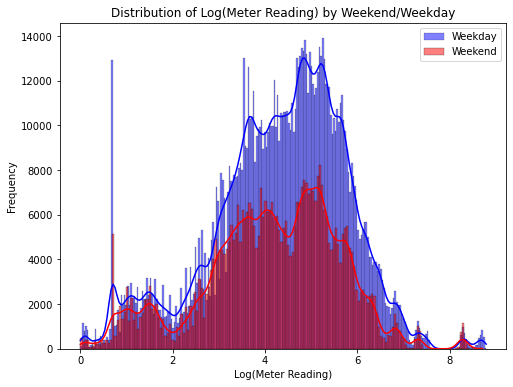

In [ ]:
# Apply a logarithmic transformation to 'meter_reading' to reduce skewness
df['log_meter_reading'] = np.log1p(df['meter_reading'])  # Using np.log1p to avoid log(0)

# Create a figure with a specified size (adjust the width and height as needed)
plt.figure(figsize=(8, 6))

# Create a distribution plot for is_weekend=0
sns.histplot(df[df['is_weekend'] == 0]['log_meter_reading'], kde=True, label='Weekday', color='blue')

# Create a distribution plot for is_weekend=1
sns.histplot(df[df['is_weekend'] == 1]['log_meter_reading'], kde=True, label='Weekend', color='red')

# Customize the plot
plt.title('Distribution of Log(Meter Reading) by Weekend/Weekday')
plt.xlabel('Log(Meter Reading)')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### Compare visualization with and without anomalies

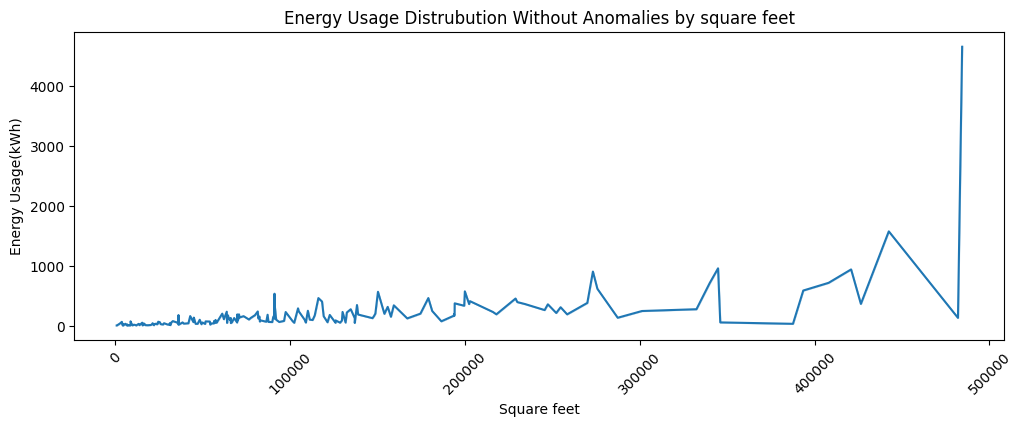

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='square_feet', y='meter_reading')
plt.title("Energy Usage Distrubution Without Anomalies by square feet")
plt.xlabel("Square feet")
plt.ylabel("Energy Usage(kWh)")
plt.xticks(rotation=45)
plt.show()

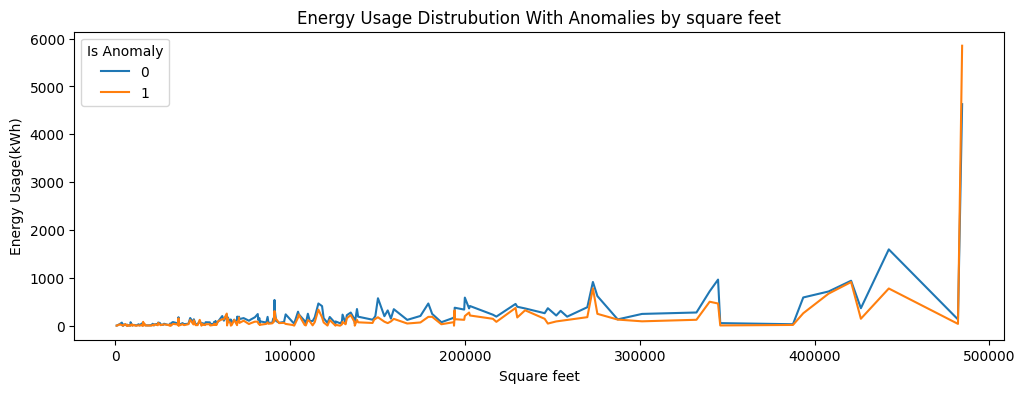

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='square_feet', y='meter_reading', hue='anomaly', data=df, ci=None)
plt.title('Energy Usage Distrubution With Anomalies by square feet')
plt.xlabel('Square feet')
plt.ylabel('Energy Usage(kWh)')
plt.legend(title='Is Anomaly', loc='upper left')
plt.show()

0(blue) is not anomaly and 1(orange) is anomaly

Anomalies occurs more frequent when the building area is larger than 400000sf

#### Scatter Plot of Square Feet vs. Meter Reading

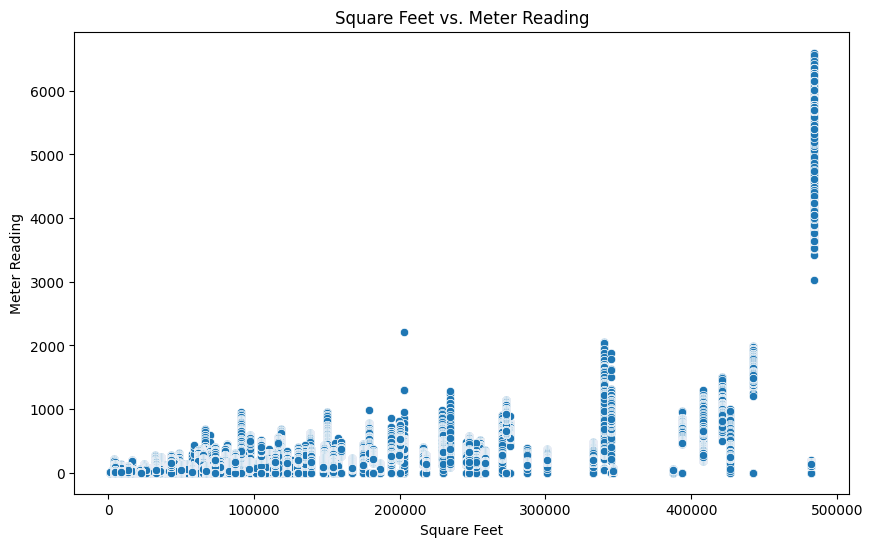

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='square_feet', y='meter_reading')
plt.title('Square Feet vs. Meter Reading')
plt.xlabel('Square Feet')
plt.ylabel('Meter Reading')
plt.show()


We can see the trend that when the square feet increases, so as the meter reading. But we have a hike at around 50000sf

#### Scatter Plot of Floor Count vs. Meter Reading

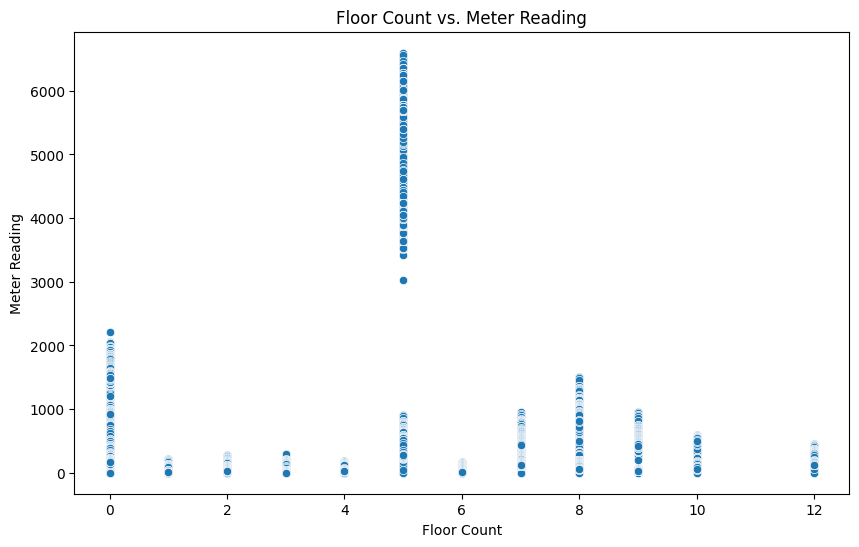

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='floor_count', y='meter_reading')
plt.title('Floor Count vs. Meter Reading')
plt.xlabel('Floor Count')
plt.ylabel('Meter Reading')
plt.show()

Buildings with 5 floors are seems to be consuming more energy than others.

#### Time Series Plot of Meter Reading with month

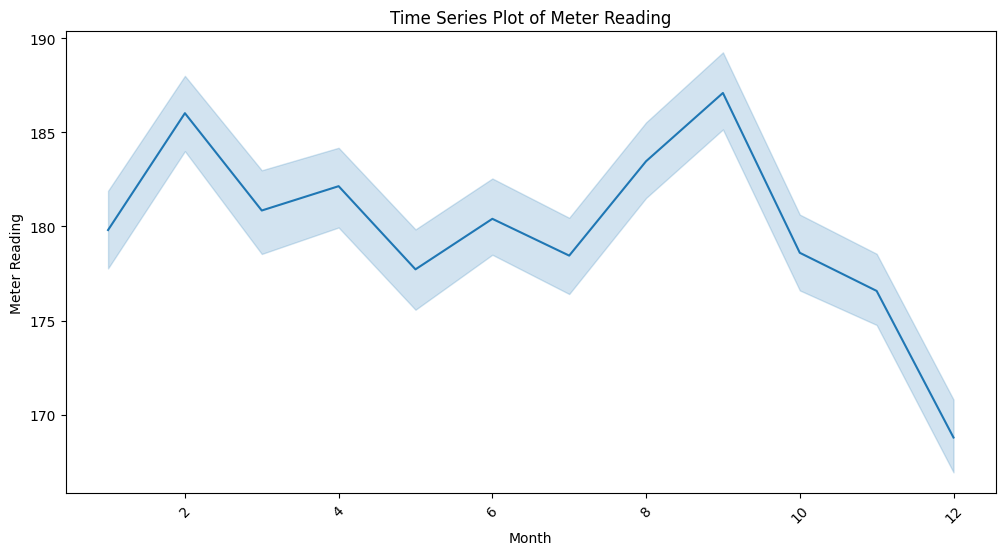

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month', y='meter_reading')
plt.title('Time Series Plot of Meter Reading')
plt.xlabel('Month')
plt.ylabel('Meter Reading')
plt.xticks(rotation=45)
plt.show()


#### Mean meter reading for each building

In [ ]:
mean_reading = df.groupby('building_id').mean()['meter_reading']

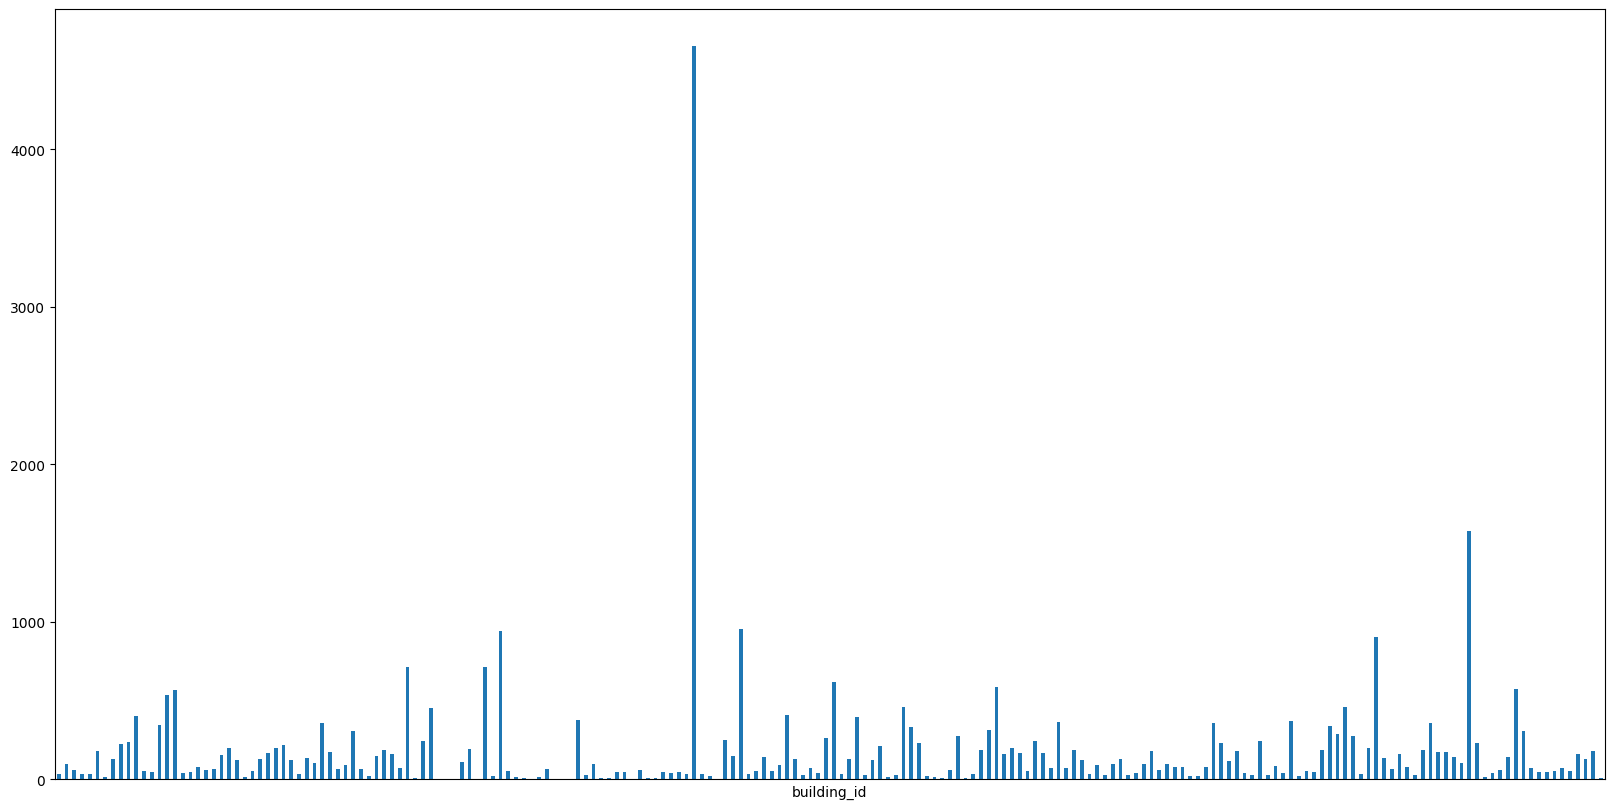

In [ ]:
plt.figure(figsize=(20,10))
mean_reading.plot.bar()
plt.xticks([])
plt.show()

In [ ]:
mean_reading.idxmax()

801

- The building with id 801 has mean meter_reading exceptionally higher than others
- Some buildings seems to have very low mean meter_reading.

#### Mean usage in hourly,monthly and daily

<Figure size 1500x500 with 0 Axes>

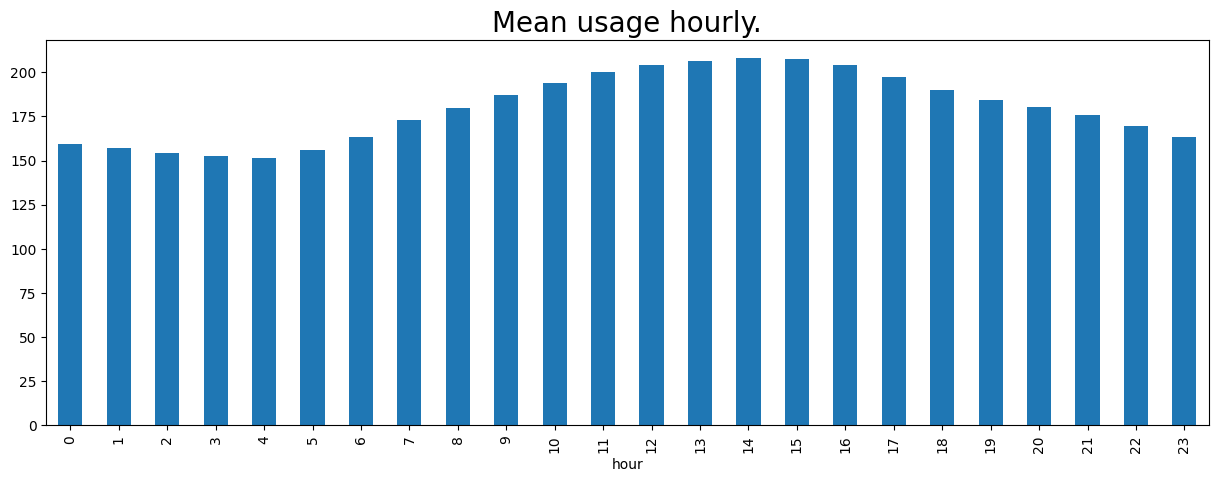

In [ ]:
plt.figure(figsize=(15, 5))
plt.figure(figsize=(15,5))
df.groupby('hour').mean()['meter_reading'].plot.bar()
plt.title('Mean usage hourly.', fontsize=20)
plt.show()

Overall, the usage starts to increase at 5am and starts to decrease after 3pm.

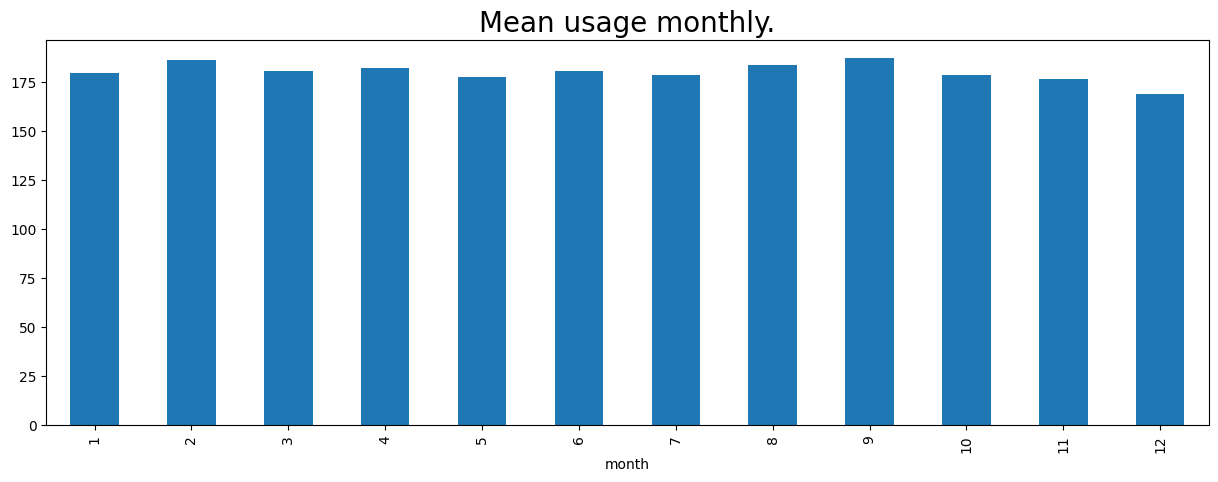

In [ ]:
plt.figure(figsize=(15,5))
df.groupby('month').mean()['meter_reading'].plot.bar()
plt.title('Mean usage monthly.', fontsize=20)
plt.show()

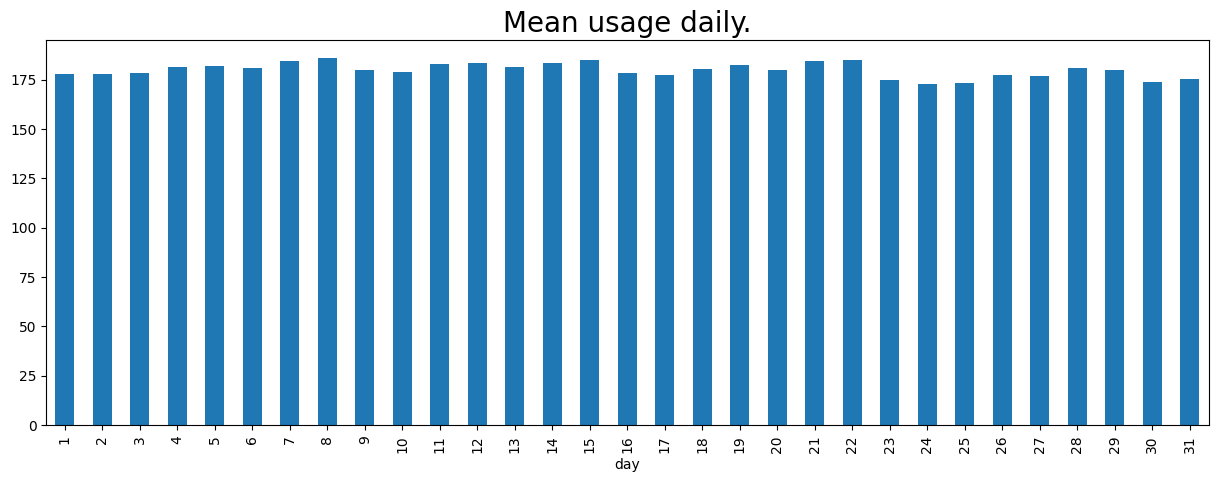

In [ ]:
plt.figure(figsize=(15,5))
df.groupby('day').mean()['meter_reading'].plot.bar()
plt.title('Mean usage daily.', fontsize=20)
plt.show()

Average energy usage daily and monthly for all buildings are about 175kWh

#### Mean usage by each primary_use

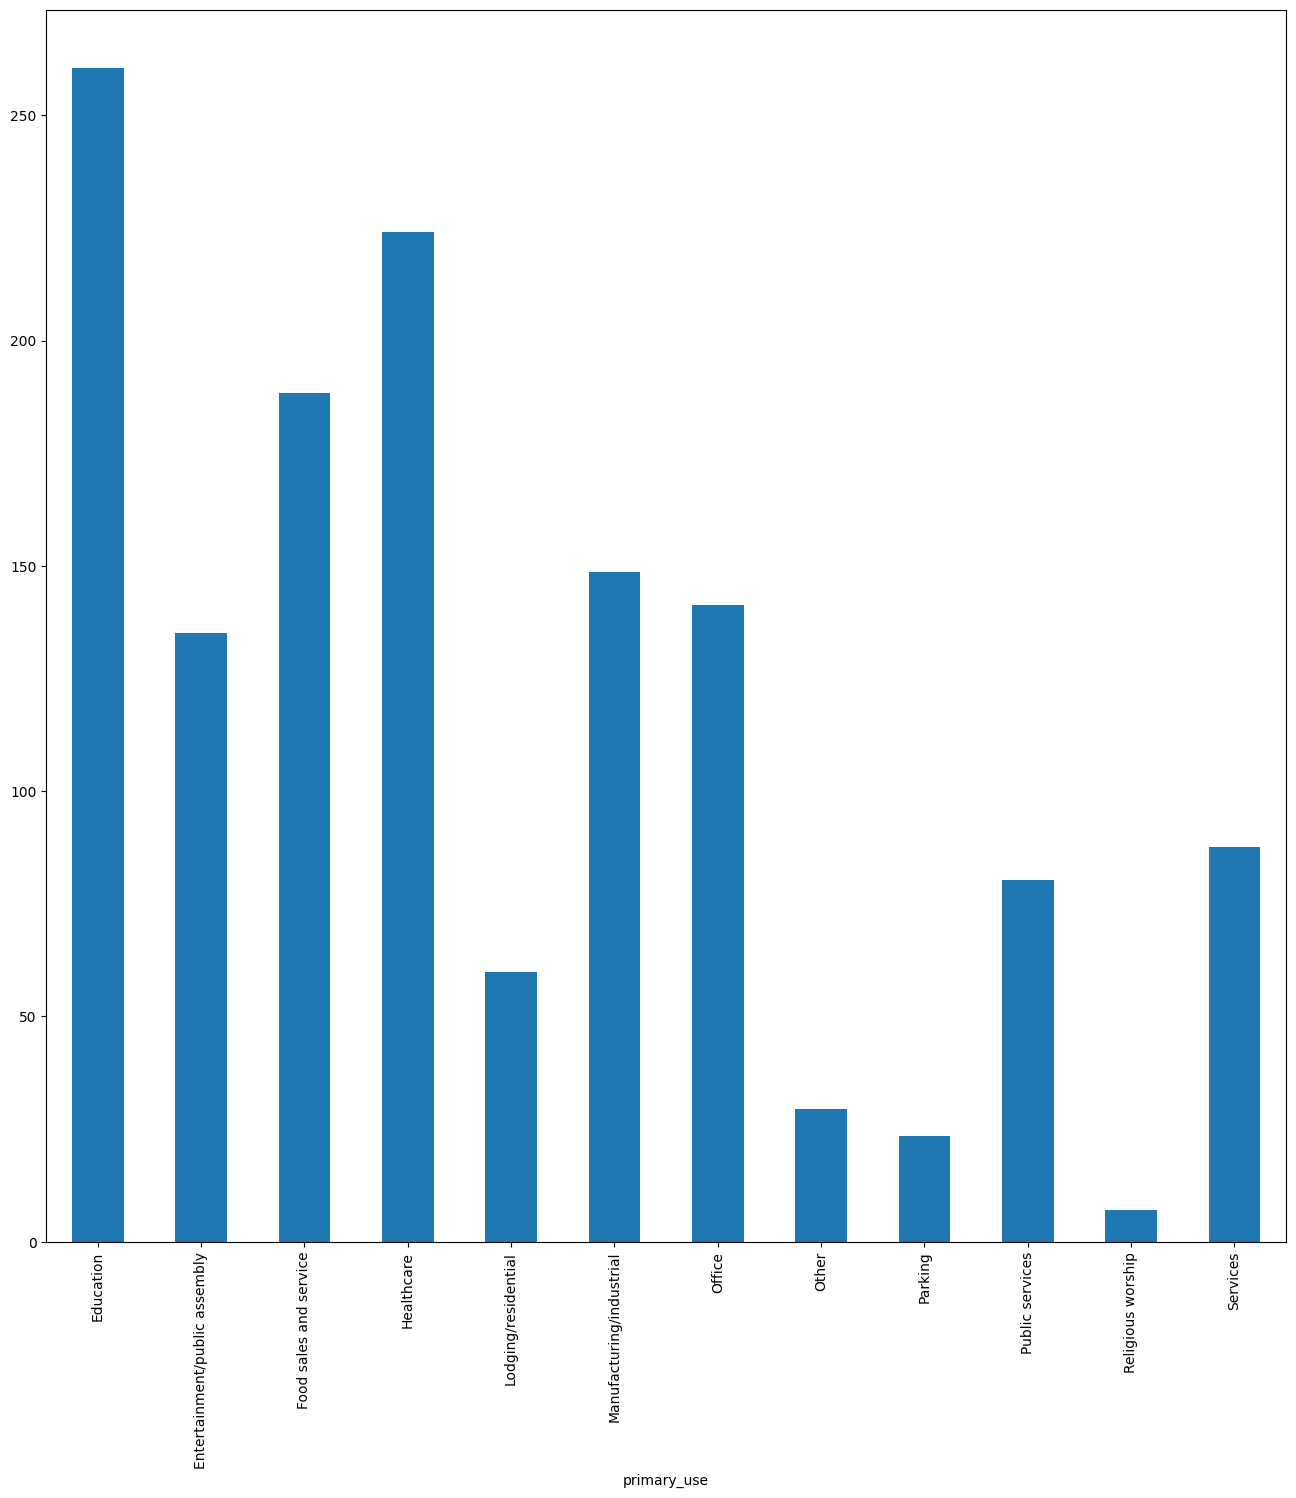

In [ ]:
plt.figure(figsize=(16, 16))
mean_by_use = df.groupby('primary_use').mean()['meter_reading']
mean_by_use.plot.bar()

plt.show()

- Each building provides only one type of usecase.

- We can see that religious places consumed the least energy while the education institutions consumed the most energy.


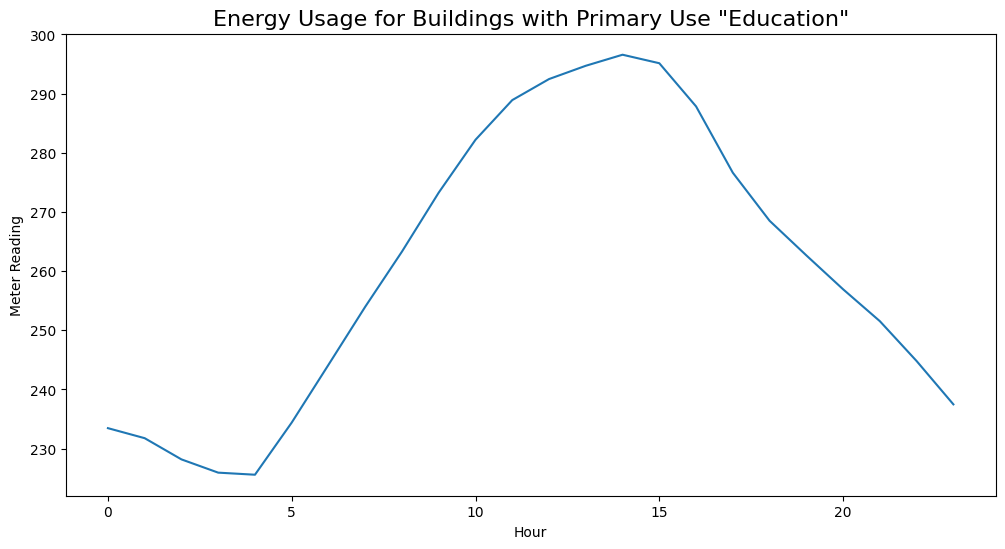

In [ ]:
# Filter data for buildings with primary_use = 'Education'
education_data = df[(df['primary_use'] == 'Education') ]

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='meter_reading', data=education_data, ci=None)
plt.title('Energy Usage for Buildings with Primary Use "Education"', fontsize=16)
plt.xlabel('Hour')
plt.ylabel('Meter Reading')
plt.show()


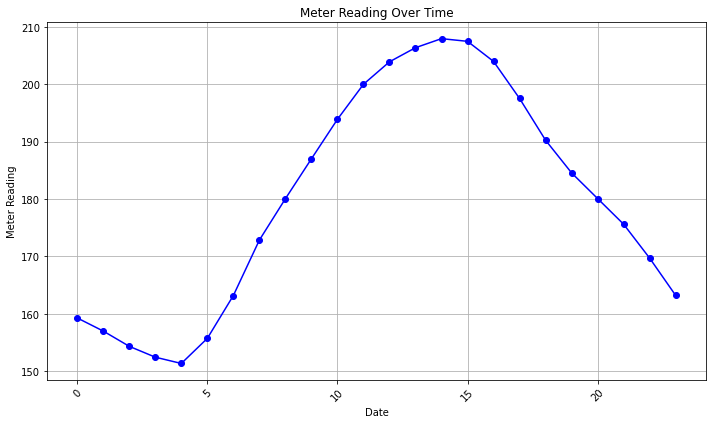

In [ ]:
# Group data by 'day' and calculate the mean meter reading for each day
grouped = df.groupby('hour')['meter_reading'].mean().reset_index()

# Extract 'day' and 'meter_reading' values
days = grouped['hour']
meter_readings = grouped['meter_reading']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(days, meter_readings, marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Meter Reading Over Time')
plt.xlabel('Date')
plt.ylabel('Meter Reading')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


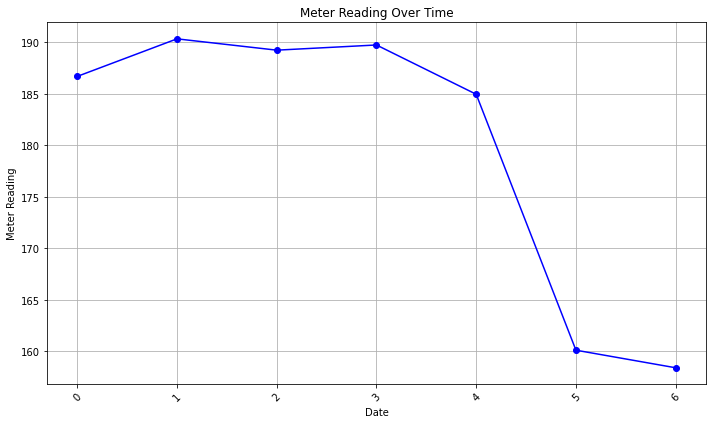

In [ ]:
# Group data by 'day' and calculate the mean meter reading for each day
grouped = df.groupby('weekday')['meter_reading'].mean().reset_index()

# Extract 'day' and 'meter_reading' values
days = grouped['weekday']
meter_readings = grouped['meter_reading']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(days, meter_readings, marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Meter Reading Over Time')
plt.xlabel('Date')
plt.ylabel('Meter Reading')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Staff and students in education institutions seems to be arriving the building starting from 4am, more and more peoples left the buildings after 3pm causing a dip in energy usage

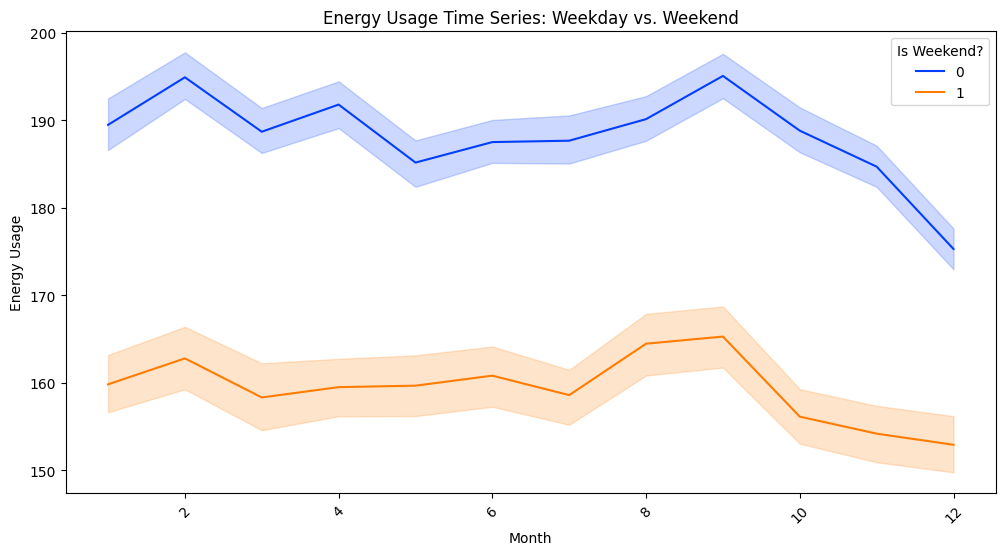

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='meter_reading', hue='is_weekend', data=df, palette='bright')
plt.title('Energy Usage Time Series: Weekday vs. Weekend')
plt.xlabel('Month')
plt.ylabel('Energy Usage')
plt.xticks(rotation=45)
plt.legend(title='Is Weekend?')
plt.show()


This means that the mean power usage of th buildings are higher during weekdays than the weekends which seems like obvious because offices, schools, colleges remains shut on the weekends.

Although from the above charts we can observe that the mean usage of all the building is approximately same throughout the year (monthly, daily) and is around 175 kwh approx. but we cannot impute the missing values with this as some buildings have very high usage stats and some buildings have readings even close to zero.

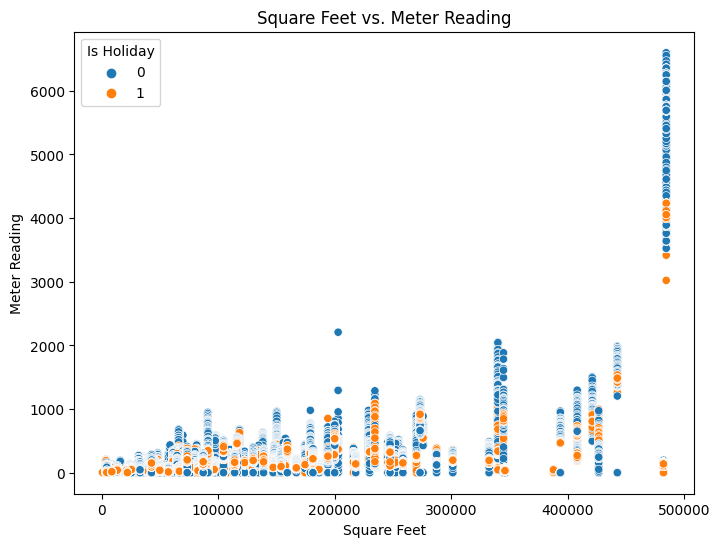

In [ ]:
# Scatter Plot for square_feet vs. meter_reading
plt.figure(figsize=(8, 6))
sns.scatterplot(x='square_feet', y='meter_reading', data=df, hue='is_weekend')
plt.xlabel('Square Feet')
plt.ylabel('Meter Reading')
plt.title('Square Feet vs. Meter Reading')
plt.legend(title='Is Holiday')
plt.show()

From here we can also see that
- most of the points with a lower value is contributed on weekend
- square feet increases so as the meter reading.

In [ ]:
y = df['anomaly']

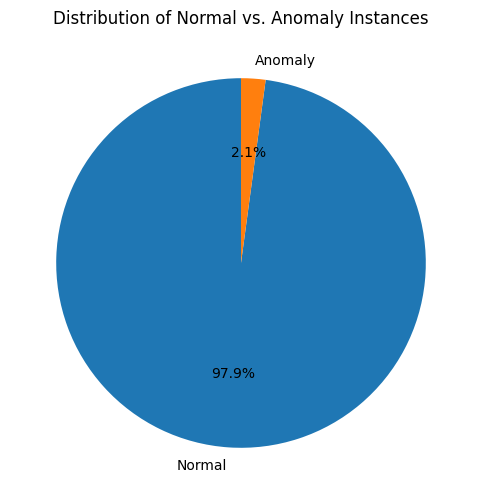

In [ ]:
import matplotlib.pyplot as plt

# Count the number of normal (0) and anomaly (1) instances
normal_count = (y == 0).sum()
anomaly_count = (y == 1).sum()

# Create a list of counts and labels for the pie chart
counts = [normal_count, anomaly_count]
labels = ['Normal', 'Anomaly']

# Create a pie chart to visualize the distribution
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Normal vs. Anomaly Instances')
plt.show()

The dataset is seriously imbalanced, so sampling methods will be applied in modeling stage later

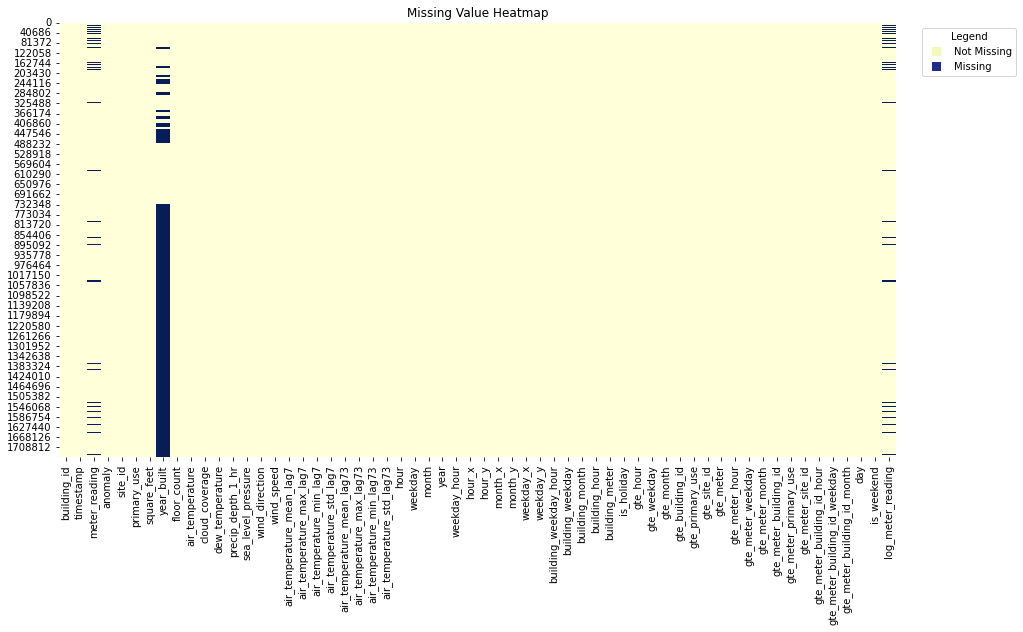

In [ ]:
# Create a DataFrame of missing values (True for missing, False for not missing)
missing_df = df.isnull()

# Set up the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(missing_df, cmap="YlGnBu", cbar=False)

# Add a legend outside the heatmap
legend_labels = ["Not Missing", "Missing"]

# Specify colors for "Not Missing" and "Missing"
color_map = [sns.color_palette("YlGnBu", n_colors=9)[0], sns.color_palette("YlGnBu", n_colors=9)[-1]]

# Add a legend outside the heatmap
legend_labels = ["Not Missing", "Missing"]
legend_handles = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color_map[i], markersize=10, label=legend_labels[i])
    for i in range(2)]
plt.legend(handles=legend_handles, title="Legend", loc='upper right', bbox_to_anchor=(1.15, 1))

# Show the plot
plt.title("Missing Value Heatmap")
plt.show()

# **5. Dimensionality Reduction**

No use of columns in the modelling with only one values for all the entries.

In [ ]:
for col in df.columns:
    if df[col].nunique()==1:
        print(col, df[col].dtype)

year int64
gte_meter float64


In [ ]:
df = df.drop(['year'], axis=1)
df = df.drop(['gte_meter'], axis=1)

We will drop timestamp column as we have extracted day,month,year,hour as new columns

In [ ]:
df.drop(['timestamp'],inplace=True, axis=1)

In [ ]:
# Define the list of columns to drop
cols_to_drop = ['weekday_hour', 'building_weekday_hour', 'building_weekday', 'building_month', 'building_hour', 'building_meter']
df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
df.shape

(1749494, 50)

# **6. One-Hot Encoding**

As primary use is the categorical variable, we will use one-hot encoding

In [ ]:
df = pd.get_dummies(df, columns=['primary_use'])

# **7. Missing Value Handling**

#### Since we are using unsupervised machine learning that using unlabeled dataset.
We will drop the target variable 'anomaly'



In [ ]:
# Extract the feature matrix and target vector
X = df.drop('anomaly', axis=1)
y = df['anomaly']

Check for null values

In [ ]:
X.isnull().sum()

building_id                                        0
meter_reading                                 107653
site_id                                            0
square_feet                                        0
year_built                                   1161101
floor_count                                        0
air_temperature                                    0
cloud_coverage                                     0
dew_temperature                                    0
precip_depth_1_hr                                  0
sea_level_pressure                                 0
wind_direction                                     0
wind_speed                                         0
air_temperature_mean_lag7                          0
air_temperature_max_lag7                           0
air_temperature_min_lag7                           0
air_temperature_std_lag7                           0
air_temperature_mean_lag73                         0
air_temperature_max_lag73                     

There are 107653 null values in meter_reading and 1161101 null values in year_built

### Method 1: Impute with 0

In [ ]:
X1=X.copy()
X1['meter_reading'] = X1['meter_reading'].fillna(0)
X1['year_built'] = X1['year_built'].fillna(0)

In [ ]:
print(X1.isna().sum().sum())

0


### Method 2: Impute with median of meter_reading

In [ ]:
X2=X.copy()

median_meter_reading = round(X2['meter_reading'].median(), 3)
X2['meter_reading'] = X2['meter_reading'].fillna(median_meter_reading)

median_year = int(round(X2['year_built'].median(), 0))
X2['year_built'] = X2['year_built'].fillna(median_year)

In [ ]:
print(X2.isna().sum().sum())

0


### Method 3: Impute with mean of each building

In [ ]:
X3=X.copy()

mean_reading = df.groupby('building_id')['meter_reading'].transform('mean').round(3)
X3['meter_reading'] = X3['meter_reading'].fillna(mean_reading)

mean_year = int(round(X3['year_built'].mean(), 0))
X3['year_built'] = X3['year_built'].fillna(0)

In [ ]:
print(X3.isna().sum().sum())

0


 # **Model Training**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, classification_report, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, StratifiedKFold
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message="One or more of the test scores are non-finite")
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")


In [ ]:
# Define the desired sampling ratio (1% of the original dataset size)
sampling_ratio = 0.1


The unsupervised machine learning algorithms we will be using in this project are:
1. Isolation Forest
2. Local Outlier Factor
3. Recurrent Neural Network
4. HBOS
5. Ensemble (IF + LOF)

# **1. Isolation Forest**
IF separate normal data points from rare or anomalous data points.
It builds a collection of decision trees, each of which isolates a subset of data points. Unlike traditional decision trees that aim to partition data evenly, IF's trees are constructed to be shallow and focus on isolating anomalies.

In [ ]:
# the threshold to convert the anomaly scores to binary
threshold = 0.2


In [ ]:
threshold
# We will tune it later, this will be the default threshold

0.2

## 1. First hyperparameter tuning

This will be done on all 9 combinations of 3 imputation methods(X1, X2 and X3 datasets) and 4 sampling methods (stratified,random sampling, random undersampling).

- From here, we can get the best combination of methods & best contamination value

- As the dataset is imbalanced, 4 types of sampling methods are examined to address the problems.

- In this stage, for each combination, we are only tuning the values of contamination of the Isolation Forest as it is the most significant hyperparameter in IF for us to get the best combination.

In next stage, we will tune the rest of the hyperparameters in Isolation Forest using Grid Search also.

### Random sampling method combination
Simple and unbiased way of selecting a subset of data from a larger population. It ensures that every data point has an equal chance of being included in the sample.

However, random sampling may not be the best choice when our dataset is imbalanced, because it may not capture the diversity and variability of the data.

For example, our dataset with 2.1% positive and the rest are negative examples, and we randomly sample 10% of the data, we may end up with only negative examples in the sample, which would not reflect the true distribution of the population.


In [ ]:
# Initialize a list to store the roc auc results
results_list = []

#### (i) Random sampling on X1

In [ ]:
# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X1, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1] # percentage of anomaly in whole dataset (0.02%)

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}

model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring="f1",n_jobs=-1)
grid_search.fit(X_train_sub, y_train_sub)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train_sub)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test_sub)
# decision_function is like predict_proba (output probability), outputs [1.0,0.8,0.5,0.1,0]

# should not use .predict this only output binary, we need score to calculate AUC
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

# Evaluate the model using classification report and ROC AUC
auc = roc_auc_score(y_test_sub, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))
print("Classification Report:")
print(classification_report(y_test_sub, y_pred_binary,digits=4))


Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5088
Classification Report:
              precision    recall  f1-score   support

           0     0.9781    0.9484    0.9630     34224
           1     0.0216    0.0509    0.0303       766

    accuracy                         0.9288     34990
   macro avg     0.4998    0.4997    0.4967     34990
weighted avg     0.9572    0.9288    0.9426     34990



**bold text**### (ii) Random sampling on X2

In [ ]:
# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X2, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1]

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}

model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring="f1",n_jobs=-1)
grid_search.fit(X_train_sub, y_train_sub)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train_sub)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test_sub)

# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

# Evaluate the model using classification report and ROC AUC
auc = roc_auc_score(y_test_sub, y_train_pred)
results_list.append(auc)

print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(roc_auc_score(y_test_sub, y_train_pred)))
print("Classification Report:")
print(classification_report(y_test_sub, y_pred_binary,digits=4))

Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5002
Classification Report:
              precision    recall  f1-score   support

           0     0.9781    0.9668    0.9724     34224
           1     0.0215    0.0326    0.0259       766

    accuracy                         0.9463     34990
   macro avg     0.4998    0.4997    0.4992     34990
weighted avg     0.9572    0.9463    0.9517     34990



#### (iii) Random sampling on X3

In [ ]:
# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X3, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1]

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}


model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring="f1",n_jobs=-1)
grid_search.fit(X_train_sub, y_train_sub)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train_sub)
# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test_sub)
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

# Evaluate the model using classification report and ROC AUC
auc = roc_auc_score(y_test_sub, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(roc_auc_score(y_test_sub, y_train_pred)))
print("Classification Report:")
print(classification_report(y_test_sub, y_pred_binary,digits=4))

Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5090
Classification Report:
              precision    recall  f1-score   support

           0     0.9781    0.9496    0.9637     34224
           1     0.0221    0.0509    0.0308       766

    accuracy                         0.9300     34990
   macro avg     0.5001    0.5003    0.4973     34990
weighted avg     0.9572    0.9300    0.9432     34990



### Stratified sampling method combination
This involves dividing the population into homogeneous subgroups (strata) based on some relevant characteristic, such as class label, gender, age, etc, we are using the class label which is 'anomaly' in our case. Then, data is randomly sampled from each stratum proportionally to its size in the population.

This ensures that each subgroup is represented in the sample according to its prevalence in the population.

As our dataset is imbalanced, stratified sampling can be useful because it can preserve the class distribution and reduce the variance within each subgroup.



#### (i) Stratified sampling on X1

In [ ]:
# Subsample the dataset

# Perform stratified sampling to create a stratified random subset of your data
X_subsample, _, y_subsample, _ = train_test_split(X1, y, test_size=(1 - sampling_ratio), random_state=42, stratify=y)
# Split the subsampled data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1]

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}


model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring="f1",n_jobs=-1)
grid_search.fit(X_train_sub, y_train_sub)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train_sub)# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test_sub)

# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test_sub, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(roc_auc_score(y_test_sub, y_train_pred)))
print("Classification Report:")
print(classification_report(y_test_sub, y_pred_binary,digits=4))

Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5124
Classification Report:
              precision    recall  f1-score   support

           0     0.9789    0.9926    0.9857     34251
           1     0.0270    0.0095    0.0140       739

    accuracy                         0.9719     34990
   macro avg     0.5030    0.5011    0.4999     34990
weighted avg     0.9588    0.9719    0.9652     34990



#### (ii) Stratified sampling on X2

In [ ]:
# Subsample the dataset

# Perform stratified sampling to create a stratified random subset of your data
X_subsample, _, y_subsample, _ = train_test_split(X2, y, test_size=(1 - sampling_ratio), random_state=42, stratify=y)
# Split the subsampled data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1]

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}


model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring="f1",n_jobs=-1)
grid_search.fit(X_train_sub, y_train_sub)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train_sub)# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test_sub)

# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test_sub, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(roc_auc_score(y_test_sub, y_train_pred)))
print("Classification Report:")
print(classification_report(y_test_sub, y_pred_binary,digits=4))

Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5084
Classification Report:
              precision    recall  f1-score   support

           0     0.9787    0.9881    0.9834     34251
           1     0.0097    0.0054    0.0070       739

    accuracy                         0.9673     34990
   macro avg     0.4942    0.4968    0.4952     34990
weighted avg     0.9583    0.9673    0.9628     34990



#### (iii) Stratified sampling on X3

In [ ]:
# Subsample the dataset

# Perform stratified sampling to create a stratified random subset of your data
X_subsample, _, y_subsample, _ = train_test_split(X3, y, test_size=(1 - sampling_ratio), random_state=42, stratify=y)
# Split the subsampled data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1]

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}
model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring="f1",n_jobs=-1)
grid_search.fit(X_train_sub, y_train_sub)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train_sub)# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test_sub)

# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test_sub, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))
print("Classification Report:")
print(classification_report(y_test_sub, y_pred_binary,digits=4))

Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5109
Classification Report:
              precision    recall  f1-score   support

           0     0.9789    0.9902    0.9845     34251
           1     0.0205    0.0095    0.0130       739

    accuracy                         0.9695     34990
   macro avg     0.4997    0.4998    0.4987     34990
weighted avg     0.9586    0.9695    0.9640     34990



In [ ]:
# Subsample the dataset

# Perform stratified sampling to create a stratified random subset of your data
X_subsample, _, y_subsample, _ = train_test_split(X3, y, test_size=(1 - sampling_ratio), random_state=42, stratify=y)
# Split the subsampled data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Define the range for contamination values
contamination_values = [0.0001]

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}
model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=2, scoring="f1",n_jobs=-1)
grid_search.fit(X_train_sub, y_train_sub)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train_sub)# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test_sub)

# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test_sub, y_train_pred)

print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))
print("Classification Report:")
print(classification_report(y_test_sub, y_pred_binary,digits=4))

Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5109
Classification Report:
              precision    recall  f1-score   support

           0     0.9789    0.9902    0.9845     34251
           1     0.0205    0.0095    0.0130       739

    accuracy                         0.9695     34990
   macro avg     0.4997    0.4998    0.4987     34990
weighted avg     0.9586    0.9695    0.9640     34990



In [ ]:
best_model

IsolationForest(contamination=0.0001, random_state=42)

In [ ]:
for index, auc in enumerate(results_list):
    formatted_auc = f"{auc:.4f}"
    if index == 0:
        print("Random sampling")
        print("Random sampling & Zero imputation\tAUC:", formatted_auc)
    elif index == 1:
        print("Random sampling & Median imputation\tAUC:", formatted_auc)
    elif index == 2:
        print("Random sampling & Mean imputation\tAUC:", formatted_auc)
    elif index == 3:
        print("\nStratified sampling")
        print("Stratified sampling & Zero imputation\tAUC:", formatted_auc)
    elif index == 4:
        print("Stratified sampling & Median imputation\tAUC:", formatted_auc)
    elif index == 5:
        print("Stratified sampling & Mean imputation\tAUC:", formatted_auc)

Random sampling
Random sampling & Zero imputation	AUC: 0.5088
Random sampling & Median imputation	AUC: 0.5002
Random sampling & Mean imputation	AUC: 0.5090

Stratified sampling
Stratified sampling & Zero imputation	AUC: 0.5124
Stratified sampling & Median imputation	AUC: 0.5084
Stratified sampling & Mean imputation	AUC: 0.5109


All the above auc results are the above 0.5, this may be due to the imbalance in the dataset, we will access the problem using random undersampling in next step

### Random undersampling method combination
This reduces the size of the majority class by randomly discarding some of its examples. This can help to decrease the imbalance between classes and make the dataset more manageable.

As our dataset is imbalanced, random under sampling is useful because it can reduce the noise and overfitting caused by too many majority instances(negative). However, under random sampling may also result in losing some valuable information and reducing the accuracy of classifiers.


#### (i) Random undersampling on X1

In [ ]:
X1_ = pd.concat([X1,y],axis=1)

# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X1_, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Random undersampling
X_train_positive = X_train.query("anomaly==1") # do this because there are very few positive samples to start with
X_train_negative = X_train.query("anomaly==0").sample(len(X_train_positive)*1,random_state=50)
X_train_resampled = pd.concat([X_train_positive,X_train_negative])
X_test = X_test.drop(columns=['anomaly'])
X_train = X_train_resampled.drop(columns=['anomaly'])
y_train = X_train_resampled['anomaly']


In [ ]:
assert len(X_train_positive) * 2 == len(X_train_resampled) > 0

In [ ]:
# Count the number of positive (1) and negative (0) instances in the training data
num_positive_instances = np.sum(y_train== 1)
num_negative_instances = np.sum(y_train == 0)

print("Number of positive instances in training data:", num_positive_instances)
print("Number of negative instances in training data:", num_negative_instances)


Number of positive instances in training data: 2975
Number of negative instances in training data: 2975


In [ ]:
print("X_train_sub shape:", X_train.shape)
print("y_train_sub shape:", y_train.shape)


X_train_sub shape: (5950, 60)
y_train_sub shape: (5950,)


In [ ]:
# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1] # percentage of anomaly in dataset (0.02%)

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}

model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=2, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test)


In [ ]:
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

In [ ]:
 np.unique(y_pred_binary)

array([0, 1])

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5376


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9781    0.9997    0.9888     34224
           1     0.0000    0.0000    0.0000       766

    accuracy                         0.9778     34990
   macro avg     0.4891    0.4999    0.4944     34990
weighted avg     0.9567    0.9778    0.9671     34990



In [ ]:
best_model

IsolationForest(contamination=0.0001, random_state=42)

#### (ii) Random undersampling on X2

In [ ]:
X2_ = pd.concat([X2,y],axis=1)

# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X2_, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Random undersampling
X_train_positive = X_train.query("anomaly==1") # do this because there are very few positive samples to start with
X_train_negative = X_train.query("anomaly==0").sample(len(X_train_positive)*1,random_state=50)
X_train_resampled = pd.concat([X_train_positive,X_train_negative])
X_test = X_test.drop(columns=['anomaly'])
X_train = X_train_resampled.drop(columns=['anomaly'])
y_train = X_train_resampled['anomaly']

In [ ]:
# Count the number of positive (1) and negative (0) instances in the training data
num_positive_instances = np.sum(y_train== 1)
num_negative_instances = np.sum(y_train == 0)

print("Number of positive instances in training data:", num_positive_instances)
print("Number of negative instances in training data:", num_negative_instances)

Number of positive instances in training data: 2975
Number of negative instances in training data: 2975


In [ ]:
# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1] # percentage of anomaly in dataset (0.02%)

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}

model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=2, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test)


In [ ]:
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

In [ ]:
 np.unique(y_pred_binary)

array([0, 1])

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5350


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9781    1.0000    0.9889     34224
           1     0.0000    0.0000    0.0000       766

    accuracy                         0.9781     34990
   macro avg     0.4891    0.5000    0.4945     34990
weighted avg     0.9567    0.9781    0.9673     34990



#### (iii) Random undersampling on X3

In [ ]:
X3_ = pd.concat([X3,y],axis=1)

# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X3_, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Random undersampling
X_train_positive = X_train.query("anomaly==1") # do this because there are very few positive samples to start with
X_train_negative = X_train.query("anomaly==0").sample(len(X_train_positive)*1,random_state=50)
X_train_resampled = pd.concat([X_train_positive,X_train_negative])
X_test = X_test.drop(columns=['anomaly'])
X_train = X_train_resampled.drop(columns=['anomaly'])
y_train = X_train_resampled['anomaly']


In [ ]:
# Count the number of positive (1) and negative (0) instances in the training data
num_positive_instances = np.sum(y_train== 1)
num_negative_instances = np.sum(y_train == 0)

print("Number of positive instances in training data:", num_positive_instances)
print("Number of negative instances in training data:", num_negative_instances)

Number of positive instances in training data: 2975
Number of negative instances in training data: 2975


In [ ]:
# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1] # percentage of anomaly in dataset (0.02%)

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}

model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=2, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test)


In [ ]:
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

In [ ]:
 np.unique(y_pred_binary)

array([0, 1])

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5383


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9781    0.9998    0.9888     34224
           1     0.0000    0.0000    0.0000       766

    accuracy                         0.9779     34990
   macro avg     0.4891    0.4999    0.4944     34990
weighted avg     0.9567    0.9779    0.9672     34990



### SMOTE method combination
SMOTE is Synthetic Minority Oversampling Technique, and it is a way of generating new synthetic examples for the minority class by interpolating between existing minority examples. This can help to increase the size and diversity of the minority class, and reduce the imbalance between classes.

As our dataset is imbalanced, SMOTE can be useful because it can improve the performance of classifiers that are sensitive to class imbalance, such as decision trees or neural networks.

#### (i) SMOTE on X1

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X1, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train_sub, y_train_sub)

# Now, X_train_resampled and y_train_resampled contain the oversampled training data

In [ ]:
# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1] # percentage of anomaly in dataset (0.02%)

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}

model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=2, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test)


In [ ]:
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

In [ ]:
 np.unique(y_pred_binary)

array([0, 1])

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5312


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9787    0.9334    0.9555     34224
           1     0.0298    0.0914    0.0449       766

    accuracy                         0.9149     34990
   macro avg     0.5042    0.5124    0.5002     34990
weighted avg     0.9579    0.9149    0.9356     34990



#### (ii) SMOTE on X2

In [ ]:
# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X2, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train_sub, y_train_sub)

# Now, X_train_resampled and y_train_resampled contain the oversampled training data

In [ ]:
# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1] # percentage of anomaly in dataset (0.02%)

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}

model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=2, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test)


In [ ]:
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

In [ ]:
 np.unique(y_pred_binary)

array([0, 1])

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5263


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9781    0.9876    0.9828     34224
           1     0.0184    0.0104    0.0133       766

    accuracy                         0.9662     34990
   macro avg     0.4982    0.4990    0.4981     34990
weighted avg     0.9571    0.9662    0.9616     34990



#### (iii) SMOTE on X3

In [ ]:
# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X3, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train_sub, y_train_sub)

# Now, X_train_resampled and y_train_resampled contain the oversampled training data

In [ ]:
# Define the range for contamination values
contamination_values = [0.0001,0.001,0.01,0.1] # percentage of anomaly in dataset (0.02%)

# Define the hyperparameter search space here
param_grid = {
    'contamination': contamination_values,
}

model = IsolationForest(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=2, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test)


In [ ]:
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

In [ ]:
 np.unique(y_pred_binary)

array([0, 1])

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)
results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: IsolationForest(contamination=0.0001, random_state=42)
ROC AUC Score: 0.5309


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9787    0.9321    0.9548     34224
           1     0.0297    0.0927    0.0449       766

    accuracy                         0.9137     34990
   macro avg     0.5042    0.5124    0.4999     34990
weighted avg     0.9579    0.9137    0.9349     34990



### Final results of first stage

In [ ]:
for index, auc in enumerate(results_list):
    formatted_auc = f"{auc:.4f}"
    if index == 0:
        print("Random sampling")
        print("Random sampling & Zero imputation\tAUC:", formatted_auc)
    elif index == 1:
        print("Random sampling & Median imputation\tAUC:", formatted_auc)
    elif index == 2:
        print("Random sampling & Mean imputation\tAUC:", formatted_auc)
    elif index == 3:
        print("\nStratified sampling")
        print("Stratified sampling & Zero imputation\tAUC:", formatted_auc)
    elif index == 4:
        print("Stratified sampling & Median imputation\tAUC:", formatted_auc)
    elif index == 5:
        print("Stratified sampling & Mean imputation\tAUC:", formatted_auc)
    elif index == 6:
        print("\nRandom undersampling")
        print("Random undersampling & Zero imputation\tAUC:", formatted_auc)
    elif index == 7:
        print("Random undersampling & Median imputation\tAUC:", formatted_auc)
    elif index == 8:
        print("Random undersampling & Mean imputation\tAUC:", formatted_auc)
    elif index == 9:
        print("\nSMOTE")
        print("SMOTE & Zero imputation\tAUC:", formatted_auc)
    elif index == 10:
        print("SMOTE & Median imputation\tAUC:", formatted_auc)
    elif index == 11:
        print("SMOTE & Mean imputation\tAUC:", formatted_auc)

Random sampling
Random sampling & Zero imputation	AUC: 0.5088
Random sampling & Median imputation	AUC: 0.5002
Random sampling & Mean imputation	AUC: 0.5090

Stratified sampling
Stratified sampling & Zero imputation	AUC: 0.5124
Stratified sampling & Median imputation	AUC: 0.5084
Stratified sampling & Mean imputation	AUC: 0.5109

Random undersampling
Random undersampling & Zero imputation	AUC: 0.5376
Random undersampling & Median imputation	AUC: 0.5350
Random undersampling & Mean imputation	AUC: 0.5383

SMOTE
SMOTE & Zero imputation	AUC: 0.5312
SMOTE & Median imputation	AUC: 0.5263
SMOTE & Mean imputation	AUC: 0.5309


In [ ]:
best_model

IsolationForest(contamination=0.0001, random_state=42)

### The **best combination** of imputation method and sampling method is:

Random undersampling & Mean imputation (Random undersampled X3)

### The **best contamination value** from GridSearchCV is:
0.0001


## 2. Regularization : Second hyperparameters tuning in-depth

IF doesn't have traditional regularization parameters like those found in linear models or neural networks. Instead, Isolation Forest relies on the properties of random splitting and isolation to detect anomalies efficiently.

Isolation Forest has 2 key hyperparameters that can be tuned to control the complexity and potential for overfitting in Isolation Forest are: max_samples and n_estimators

Therefore, we will use the best combination of imputation method and sampling method to tune all the hyperparameters of Isolation Forest in this stage.
('n_estimators','bootstrap',   'verbose' ,'max_features','max_samples')

- From second hyperparameter tuning, we can get the final best hyperparameters for Isolation Forest.


### Random undersampling on X3 with hyperparameters tuning in-depth

In [ ]:
X3_ = pd.concat([X3,y],axis=1)

# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X3_, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Random undersampling
X_train_positive = X_train.query("anomaly==1") # do this because there are very few positive samples to start with
X_train_negative = X_train.query("anomaly==0").sample(len(X_train_positive)*1,random_state=50)
X_train_resampled = pd.concat([X_train_positive,X_train_negative])
X_test = X_test.drop(columns=['anomaly'])
X_train = X_train_resampled.drop(columns=['anomaly'])
y_train = X_train_resampled['anomaly']


In [ ]:
from sklearn.metrics import make_scorer, f1_score
# Define the hyperparameter search space
param_grid = {
    'contamination': [0.0001],
    'n_estimators': [3,5,10,30],
    'bootstrap': [True, False],
    'verbose' : [1,2,3,4],
    'max_features': [3,5,10],
    'max_samples': [5,10,30,50,100]
}
model = IsolationForest(random_state=42)
# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=2, scoring=f1_score, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = IsolationForest(**best_params, random_state=42)
best_model.fit(X_train)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test)


In [ ]:
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

In [ ]:
 np.unique(y_pred_binary)

array([0, 1])

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)
# results_list.append(auc)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: IsolationForest(bootstrap=True, contamination=0.0001, max_features=3,
                max_samples=5, n_estimators=3, random_state=42, verbose=1)
ROC AUC Score: 0.4957


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9776    0.3506    0.5161     34224
           1     0.0216    0.6410    0.0418       766

    accuracy                         0.3570     34990
   macro avg     0.4996    0.4958    0.2790     34990
weighted avg     0.9567    0.3570    0.5057     34990



**Best hyperparameters :**

IsolationForest(bootstrap=True, contamination=0.0001, max_features=3,
                max_samples=5, n_estimators=3, random_state=42, verbose=1)

## Tuning threshold

In [ ]:
# Train the model with the best hyperparameters
best_model = IsolationForest(bootstrap=True, contamination=0.0001, max_features=3, max_samples=5, n_estimators=3, random_state=42, verbose=1)
best_model.fit(X_train)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test)

In [ ]:
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score,roc_auc_score

thresholds = np.linspace(0.2, 0.5, 20)
thresholds_rounded = np.round(thresholds, 4)
thresholds_rounded


array([0.2   , 0.2158, 0.2316, 0.2474, 0.2632, 0.2789, 0.2947, 0.3105,
       0.3263, 0.3421, 0.3579, 0.3737, 0.3895, 0.4053, 0.4211, 0.4368,
       0.4526, 0.4684, 0.4842, 0.5   ])

In [ ]:
roc_scores = []

for threshold in thresholds_rounded:
    y_pred_binary = (y_train_pred > threshold).astype(int)
    roc = roc_auc_score(y_test, y_pred_binary)
    roc_scores.append(roc)
best_threshold = thresholds_rounded[np.argmax(roc_scores)]
best_threshold

0.3737

Visualizing threshold

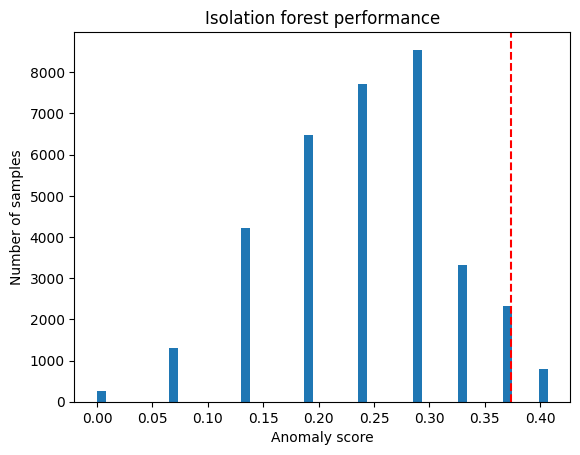

In [ ]:
import matplotlib.pyplot as plt
# Plot the anomaly scores
plt.hist(y_train_pred, bins=50)
# Add a vertical line for the threshold
plt.axvline(x=best_threshold, color='red', linestyle='--')
# Add labels and title
plt.xlabel('Anomaly score')
plt.ylabel('Number of samples')
plt.title('Isolation forest performance')
# Show the plot
plt.show()


The good threshold line should be at the right side of the graph plotted, because that means that the number of samples with higher anomaly score is lower.This graph shows that the tuned threshold is good enough

The anomaly score is a measure of how isolated a sample is from the rest of the data, and higher scores indicate more abnormal samples.

A good threshold should be high enough to exclude most of the normal samples, but low enough to include most of the outliers.



## Final Isolation Forest with best hyperparameters and best threshold

In [ ]:
best_model.fit(X_train)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test)
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > best_threshold).astype(int)

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)
print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: IsolationForest(bootstrap=True, contamination=0.0001, max_features=3,
                max_samples=5, n_estimators=3, random_state=42, verbose=1)
ROC AUC Score: 0.4957


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9782    0.9774    0.9778     34224
           1     0.0252    0.0261    0.0256       766

    accuracy                         0.9565     34990
   macro avg     0.5017    0.5017    0.5017     34990
weighted avg     0.9573    0.9565    0.9569     34990



After using Isolation Forest with the best hyperparameters and best threshold, the ROC AUC score remained unchanged but the f1 score for normal instances and accuracy increased

## In conclusion,
- best combination of imputation method and sampling method is: Random undersampling & Mean imputation (Random undersampled X3)
- best contamination value from GridSearchCV is: 0.0001
- best hyperparameters are: IsolationForest(bootstrap=True, contamination=0.0001, max_features=3, max_samples=5, n_estimators=3, random_state=42, verbose=1)
- best threshold for isolation forest is: 0.3737

# **2. Local Outlier Factor**

LOF is a unsupervised outlier detection algorithm.

It is based on the concept of nearest neighbors. LOF is used to detect anomalies in unlabeled data its performance can be evaluated using labeled data. It is often used in combination with the evaluation metric AUC

### The **best combination** of imputation method and sampling method is:

Random undersampling & Mean imputation (X3) that we identified from the previous algorithm
This combination is used to perform hyperparameter tuning for the rest of the models

In [ ]:
# the threshold to convert the anomaly scores to binary
threshold = 0.5


## Hyperparameters in LOF:
- n_neighbors: The number of neighbors to use for measuring the local density of each sample.
- contamination: The proportion of outliers in the data set.
- algorithm: The algorithm used to compute the nearest neighbors. It can be ‘auto’, ‘ball_tree’, ‘kd_tree’, or ‘brute’. The default value is ‘auto’
- metric: The distance metric used to calculate the distance between two samples. It can be ‘minkowski’, ‘manhattan’, or any other valid distance metric supported by sklearn.neighbors.DistanceMetric.
- leaf_size: The leaf size of the tree used in ball_tree or kd_tree algorithms.
- p: The power parameter for the Minkowski metric.
- metric_params: Additional keyword arguments for the distance metric function.

###  Regularization: Random undersampling on X3

LOF doesn't inherently incorporate regularization terms like some other machine learning models (e.g., neural networks or linear regression).
We will perform GridSearchCV to find the best hyperparameters for the model and tune the threshold

In [ ]:
X3_ = pd.concat([X3,y],axis=1)

# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X3_, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Random undersampling
X_train_positive = X_train.query("anomaly==1") # do this because there are very few positive samples to start with
X_train_negative = X_train.query("anomaly==0").sample(len(X_train_positive)*1,random_state=50)
X_train_resampled = pd.concat([X_train_positive,X_train_negative])
X_test = X_test.drop(columns=['anomaly'])
X_train = X_train_resampled.drop(columns=['anomaly'])
y_train = X_train_resampled['anomaly']


In [ ]:
# Count the number of positive (1) and negative (0) instances in the training data
num_positive_instances = np.sum(y_train== 1)
num_negative_instances = np.sum(y_train == 0)

print("Number of positive instances in training data:", num_positive_instances)
print("Number of negative instances in training data:", num_negative_instances)

Number of positive instances in training data: 2975
Number of negative instances in training data: 2975


In [ ]:
# Define the hyperparameter search space here
param_grid = {
    'n_neighbors': [5, 10, 15, 20],  # Number of neighbors to consider
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for nearest neighbors
    'leaf_size': [5, 10, 20, 30],  # Leaf size for tree-based algorithms
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Distance metric
}

# set novelty to true to predict on new unseen data (test)
model = LocalOutlierFactor(novelty=True)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=2, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = LocalOutlierFactor(**best_params, novelty=True)
best_model.fit(X_train)

# Evaluate the model on the testing set
y_train_pred = best_model.decision_function(X_test)


In [ ]:
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > threshold).astype(int)
np.unique(y_pred_binary)

array([0, 1])

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)

print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: LocalOutlierFactor(leaf_size=5, metric='euclidean', n_neighbors=5, novelty=True)
ROC AUC Score: 0.5201


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9780    0.9499    0.9637     34224
           1     0.0200    0.0457    0.0278       766

    accuracy                         0.9301     34990
   macro avg     0.4990    0.4978    0.4958     34990
weighted avg     0.9570    0.9301    0.9432     34990



In [ ]:
best_model

LocalOutlierFactor(leaf_size=5, metric='euclidean', n_neighbors=5, novelty=True)

## Threshold tuning using best model

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

min_threshold=np.percentile(y_train_pred, 85)
max_threshold=np.percentile(y_train_pred, 95)
thresholds = np.linspace(min_threshold, max_threshold, 20)
thresholds_rounded = np.round(thresholds, 4)
thresholds_rounded


array([0.526 , 0.5273, 0.5286, 0.5299, 0.5312, 0.5325, 0.5338, 0.5351,
       0.5364, 0.5377, 0.539 , 0.5403, 0.5416, 0.5429, 0.5442, 0.5455,
       0.5468, 0.5481, 0.5494, 0.5507])

In [ ]:
f1_scores = []

for threshold in thresholds_rounded:
    y_pred_binary = (y_train_pred > threshold).astype(int)
    f1 = f1_score(y_test, y_pred_binary)
    unique_values = np.unique(y_pred_binary)
    if len(unique_values) == 2:
        f1_scores.append(f1)

best_threshold = thresholds_rounded[np.argmax(f1_scores)]
best_threshold

0.5299

In [ ]:
# Convert anomaly scores to binary labels
y_pred_binary = (y_train_pred > best_threshold).astype(int)
np.unique(y_pred_binary)

array([0, 1])

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)

print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: LocalOutlierFactor(leaf_size=5, metric='euclidean', n_neighbors=5, novelty=True)
ROC AUC Score: 0.5201


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9783    0.8744    0.9234     34224
           1     0.0230    0.1319    0.0391       766

    accuracy                         0.8582     34990
   macro avg     0.5006    0.5031    0.4813     34990
weighted avg     0.9573    0.8582    0.9041     34990



After tuning the threshold, the model have better accuracy & better f1 score for the negative class(normal) but worse score for the positive class(anomalies)

Visualizing threshold

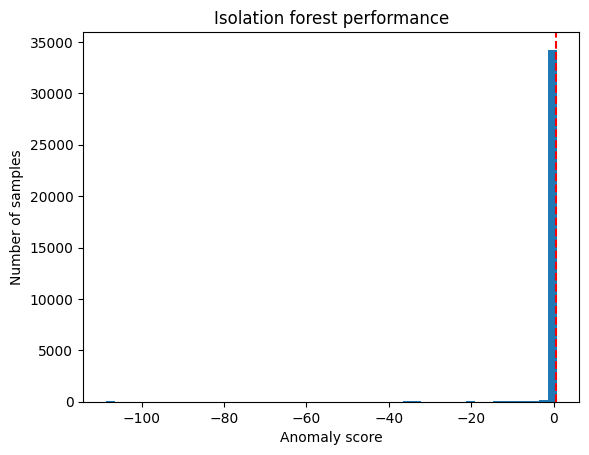

In [ ]:
import matplotlib.pyplot as plt
# Plot the anomaly scores
plt.hist(y_train_pred, bins=50)
# Add a vertical line for the threshold
plt.axvline(x=best_threshold, color='red', linestyle='--')
# Add labels and title
plt.xlabel('Anomaly score')
plt.ylabel('Number of samples')
plt.title('Isolation forest performance')
# Show the plot
plt.show()


The good threshold line should be at the right side of the graph plotted, because that means that the number of samples with higher anomaly score is lower.This graph shows that the tuned threshold is good enough

The anomaly score is a measure of how isolated a sample is from the rest of the data, and higher scores indicate more abnormal samples.

A good threshold should be high enough to exclude most of the normal samples, but low enough to include most of the outliers.



## In conclusion,
- best hyperparameters are: LocalOutlierFactor(leaf_size=5, metric='euclidean', n_neighbors=5, novelty=True)
- best threshold for lof is: 0.5299

# **3. Recurrent Neural Network(RNN)**

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    precision_recall_curve, auc
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import resample
from keras.models import Sequential, Model
from keras.layers import (
    LSTM, Input, Dropout, RepeatVector,
    TimeDistributed, Dense
)
from keras.optimizers import Adam
from keras.models import Sequential
from keras.regularizers import l1, l2
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Set warnings filter to ignore specific warnings
warnings.filterwarnings('ignore')

dataframe - sample data of 10% of actual data

df - only timestamp and meter_reading column (timestamp need to_datetime, meter_reading need no missing value)

In [ ]:
dataframe = pd.read_csv('X3_undersampling_rnn.csv')

In [ ]:
df = dataframe[['timestamp', 'meter_reading']]

In [ ]:
df.loc[:, 'timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.shape

(5950, 2)

In [ ]:
df = df.dropna()

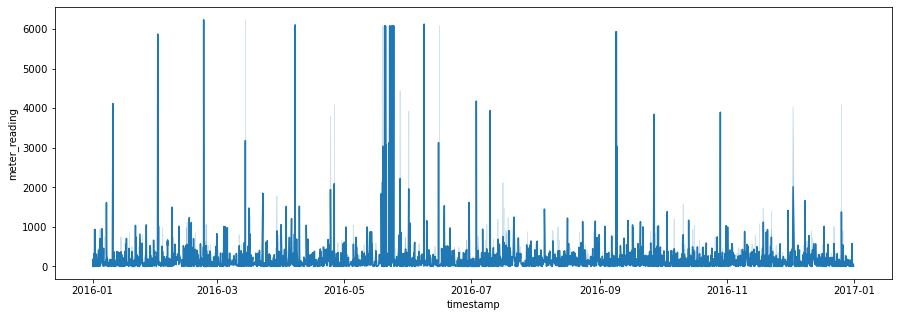

In [ ]:
# Set the size of the plot
plt.figure(figsize=(15, 5))  # Adjust width and height as needed

# Create the line plot
sns.lineplot(x=df['timestamp'], y=df['meter_reading'])

# Show the plot
plt.show()

In [ ]:
print("Start date is: ", df['timestamp'].min())
print("End date is: ", df['timestamp'].max())

Start date is:  2016-01-01 00:00:00
End date is:  2016-12-31 20:00:00


# Data Spliting

In [ ]:
#Change train data from Mid 2017 to 2019.... seems to be a jump early 2017
train, test = df.loc[df['timestamp'] <= '2016-08-01 00:00:00'], df.loc[df['timestamp'] > '2016-08-01 00:00:00']

# Normalise

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(train[['meter_reading']])

In [ ]:
train['meter_reading'] = scaler.transform(train[['meter_reading']])
test['meter_reading'] = scaler.transform(test[['meter_reading']])

# Convert to sequence

In [ ]:
seq_size = 30  # Number of time steps to look back

#Larger sequences (look further back) may improve forecasting.

def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        #print(i)
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])

    return np.array(x_values), np.array(y_values)

trainX, trainY = to_sequences(train[['meter_reading']], train['meter_reading'], seq_size)
testX, testY = to_sequences(test[['meter_reading']], test['meter_reading'], seq_size)

# Model Training

In [ ]:
# Define your model
model = Sequential()

# Reduce the number of LSTM units
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2])))

# Increase the dropout rate
model.add(Dropout(rate=0.5))

model.add(RepeatVector(trainX.shape[1]))

# Reduce the number of LSTM units in the second LSTM layer
model.add(LSTM(64, return_sequences=True))

# Increase the dropout rate in the second LSTM layer
model.add(Dropout(rate=0.5))

# Add L1 or L2 regularization to the Dense layer
model.add(TimeDistributed(Dense(trainX.shape[2], kernel_regularizer=l2(0.01))))

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 64)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 1)            65        
 ibuted)                                                

In [ ]:
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
103/103 [==============================] - 9s 39ms/step - loss: 0.3324 - val_loss: 0.2611
Epoch 2/10
103/103 [==============================] - 3s 32ms/step - loss: 0.3186 - val_loss: 0.2592
Epoch 3/10
103/103 [==============================] - 3s 32ms/step - loss: 0.3134 - val_loss: 0.2530
Epoch 4/10
103/103 [==============================] - 3s 32ms/step - loss: 0.3110 - val_loss: 0.2496
Epoch 5/10
103/103 [==============================] - 3s 31ms/step - loss: 0.3096 - val_loss: 0.2558
Epoch 6/10
103/103 [==============================] - 3s 30ms/step - loss: 0.3086 - val_loss: 0.2536
Epoch 7/10
103/103 [==============================] - 3s 34ms/step - loss: 0.3077 - val_loss: 0.2499
Epoch 8/10
103/103 [==============================] - 3s 33ms/step - loss: 0.3074 - val_loss: 0.2505
Epoch 9/10
103/103 [==============================] - 3s 30ms/step - loss: 0.3070 - val_loss: 0.2503
Epoch 10/10
103/103 [==============================] - 3s 31ms/step - loss: 0.3068 - val_lo

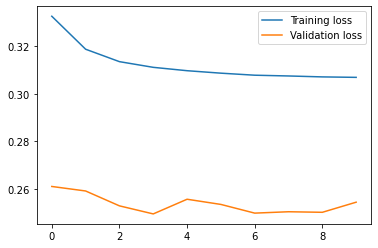

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

the above train/validation plot show terrible training

In [ ]:
model.evaluate(testX, testY)

71/71 [==============================] - 1s 10ms/step - loss: 0.2416


0.24156895279884338

114/114 [==============================] - 2s 10ms/step


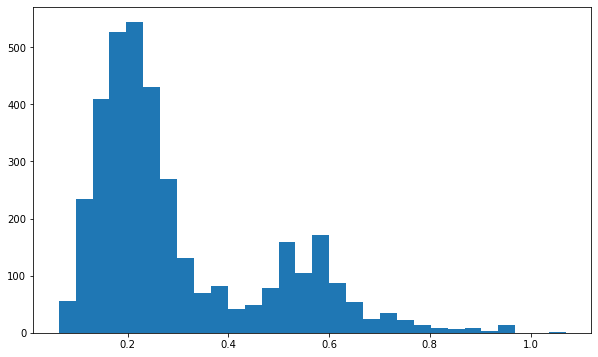

In [ ]:
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)

plt.figure(figsize=(10, 6))  # Adjust width and height as needed
plt.hist(trainMAE, bins=30)
plt.show()

# Find optimum threshold

In [ ]:
from sklearn.metrics import classification_report

thresholds = np.linspace(0.01, 1, num=10)

# Initialize variables to keep track of the best threshold and metric
best_threshold = None
best_metric = 0.0  # Initialize with a low value

# Initialize an empty list to store classification reports for each threshold
classification_reports = []

testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['testMAE'] = anomaly_df['testMAE'].astype(float)

for threshold in thresholds:
    # Compare 'testMAE' with the current threshold element-wise
    anomaly_df['anomaly'] = anomaly_df['testMAE'] > threshold
    anomaly_df['meter_reading'] = test[seq_size:]['meter_reading']
    merged_data = dataframe.merge(anomaly_df, left_index=True, right_index=True, how='inner')

    y_test = merged_data['anomaly_x']
    y_pred_binary = merged_data['anomaly_y']

    # Calculate and store the classification report for the current threshold
    report = classification_report(y_test, y_pred_binary, digits=4)
    print("")
    print(f"Threshold: {threshold:.4f}\nClassification Report:\n{report}")

    report = classification_report(y_test, y_pred_binary, digits=4, output_dict=True)
    classification_reports.append((threshold, report))
    # Check if the current threshold has a better F1-score than the best one so far
    current_f1_score = report['1']['f1-score']  # Assuming you are interested in F1-score for class 1
    if current_f1_score > best_metric:
        best_metric = current_f1_score
        best_threshold = threshold



71/71 [==============================] - 1s 11ms/step

Threshold: 0.0100
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1210
           1     0.4634    1.0000    0.6333      1045

    accuracy                         0.4634      2255
   macro avg     0.2317    0.5000    0.3167      2255
weighted avg     0.2148    0.4634    0.2935      2255


Threshold: 0.1200
Classification Report:
              precision    recall  f1-score   support

           0     0.1000    0.0050    0.0094      1210
           1     0.4515    0.9483    0.6117      1045

    accuracy                         0.4421      2255
   macro avg     0.2757    0.4766    0.3106      2255
weighted avg     0.2629    0.4421    0.2886      2255


Threshold: 0.2300
Classification Report:
              precision    recall  f1-score   support

           0     0.4177    0.4380    0.4276      1210
           1     0.3103    0.2928    0.3013      1045

  

# Visualize Threshold

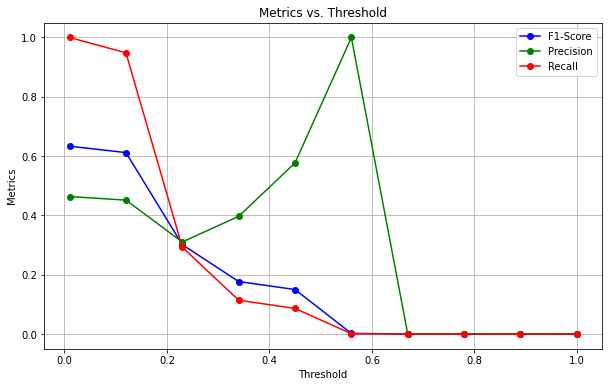

In [ ]:
# Assuming you have stored thresholds and corresponding metrics in dictionaries
thresholds = [entry[0] for entry in classification_reports]
metrics = [entry[1] for entry in classification_reports]

# Extract F1-scores, precision, and recall for Class 1
f1_scores = [metric['1']['f1-score'] for metric in metrics]
precision = [metric['1']['precision'] for metric in metrics]
recall = [metric['1']['recall'] for metric in metrics]

# Create a line plot for F1-score
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-', color='b', label='F1-Score')

# Create a line plot for precision
plt.plot(thresholds, precision, marker='o', linestyle='-', color='g', label='Precision')

# Create a line plot for recall
plt.plot(thresholds, recall, marker='o', linestyle='-', color='r', label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()


### Observation: The optimum threshold is 0.23

In [ ]:
best_threshold = 0.23

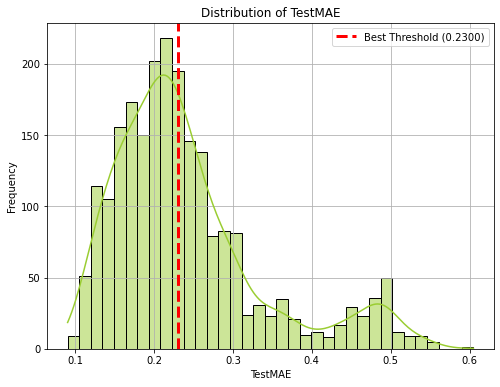

In [ ]:
# Create a histogram or distribution plot for 'testMAE'
plt.figure(figsize=(8, 6))
sns.histplot(anomaly_df['testMAE'], kde=True, color='yellowgreen')
plt.xlabel('TestMAE')
plt.ylabel('Frequency')
plt.title('Distribution of TestMAE')
plt.grid(True)

# Add a thicker vertical line to indicate the best threshold
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold ({best_threshold:.4f})', linewidth=3.0)

# Show a legend
plt.legend()
plt.show()

# Apply the optimum threshold to test data

In [ ]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)

#Capture all details in a DataFrame for easy plotting
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['testMAE'] = anomaly_df['testMAE'].astype(float)
anomaly_df['max_trainMAE'] = best_threshold
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
anomaly_df['meter_reading'] = test[seq_size:]['meter_reading']

71/71 [==============================] - 1s 14ms/step


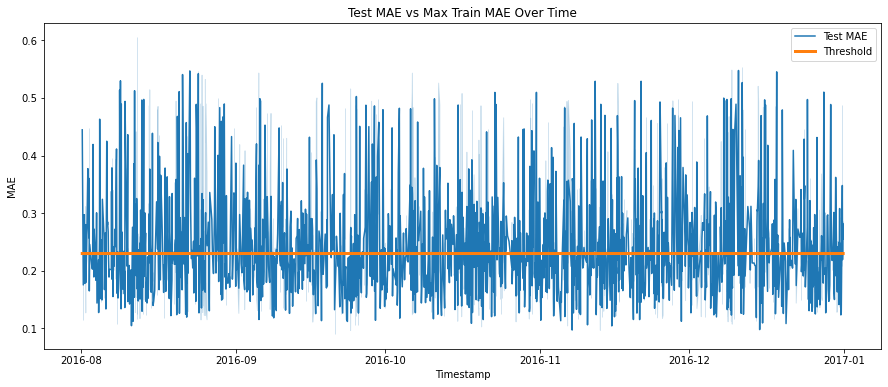

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.lineplot(x='timestamp', y='testMAE', data=anomaly_df, label='Test MAE')
sns.lineplot(x='timestamp', y='max_trainMAE', data=anomaly_df, label='Threshold',linewidth=3.0)
plt.xlabel('Timestamp')
plt.ylabel('MAE')
plt.title('Test MAE vs Max Train MAE Over Time')
plt.legend()
plt.show()


# Rows that predicted yes that actual yes (True Positive)

In [ ]:
# Assuming you have a DataFrame merged_data

# Use boolean indexing to filter rows where 'anomaly_x' == 1 and 'anomaly_y' == 1
merged_data = dataframe.merge(anomaly_df, left_index=True, right_index=True, how='inner')
TP = merged_data[(merged_data['anomaly_x'] == 1) & (merged_data['anomaly_y'] == 1)]

# Print the filtered rows
TP

,building_id,timestamp_x,meter_reading_x,anomaly_x,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month,day,is_weekend,timestamp_y,meter_reading_y,testMAE,max_trainMAE,anomaly_y
114,1275,2016-09-02 18:00:00,196.362,1,14,Office,114166,0.0,0,25.0,...,5.324,5.169,5.157,2,0,2016-09-02 18:00:00,0.044154,0.230283,0.23,True
116,345,2016-11-23 09:00:00,0.040,1,3,Lodging/residential,7250,0.0,0,4.4,...,0.407,0.433,0.056,23,0,2016-11-23 09:00:00,-0.321379,0.235885,0.23,True
117,254,2016-10-15 20:00:00,410.100,1,2,Entertainment/public assembly,254766,1989.0,0,31.1,...,5.903,5.585,5.765,15,1,2016-10-15 20:00:00,0.442113,0.234002,0.23,True
118,560,2016-12-17 16:00:00,972.910,1,3,Office,340000,2010.0,0,6.1,...,6.677,5.973,6.385,17,1,2016-12-17 16:00:00,1.490011,0.249095,0.23,True
119,290,2016-11-25 10:00:00,21.760,1,2,Office,51732,1966.0,0,20.0,...,4.610,4.152,3.890,25,0,2016-11-25 10:00:00,-0.280938,0.303482,0.23,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,1309,2016-12-09 04:00:00,1.000,1,14,Lodging/residential,58041,0.0,0,-1.1,...,3.986,3.893,3.535,9,0,2016-12-09 04:00:00,-0.319591,0.266815,0.23,True
2786,1258,2016-10-11 16:00:00,1.000,1,14,Education,273234,0.0,0,17.8,...,6.861,6.827,6.853,11,0,2016-10-11 16:00:00,-0.319591,0.255153,0.23,True
2789,882,2016-10-17 08:00:00,42.000,1,9,Education,39143,0.0,0,25.0,...,3.481,3.604,3.553,17,0,2016-10-17 08:00:00,-0.243253,0.254898,0.23,True
2790,1266,2016-08-23 12:00:00,8.000,1,14,Public services,13469,0.0,0,25.6,...,3.066,3.234,2.614,23,0,2016-08-23 12:00:00,-0.306558,0.251268,0.23,True


# Model Evaluation

In [ ]:
y_test = merged_data['anomaly_x']
y_pred = merged_data['anomaly_y']

report = classification_report(y_test, y_pred, digits=4)
print(f"Threshold: {best_threshold:.4f}\nClassification Report:\n{report}")

Threshold: 0.2300
Classification Report:
              precision    recall  f1-score   support

           0     0.4177    0.4380    0.4276      1210
           1     0.3103    0.2928    0.3013      1045

    accuracy                         0.3707      2255
   macro avg     0.3640    0.3654    0.3645      2255
weighted avg     0.3679    0.3707    0.3691      2255



In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have calculated probabilities for your binary predictions
# 'y_pred_probs' should be a 1D array or list containing the predicted probabilities

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.3654


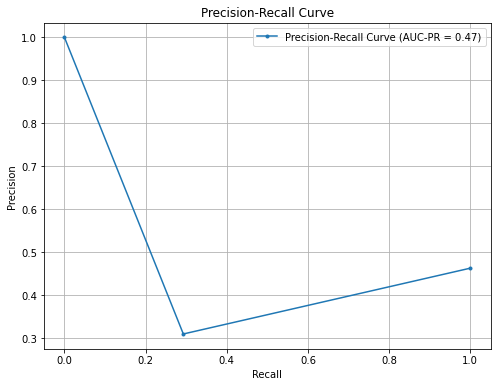

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Assuming you have calculated probabilities for your binary predictions
# 'y_pred_probs' should be a 1D array or list containing the predicted probabilities
# 'y_test' should be your true binary labels (0s and 1s)

# Calculate precision and recall values at various threshold levels
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate the Area Under the Precision-Recall Curve (AUC-PR)
auc_pr = auc(recall, precision)

# Plot the precision-recall curve with AUC-PR displayed in the legend
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall Curve (AUC-PR = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


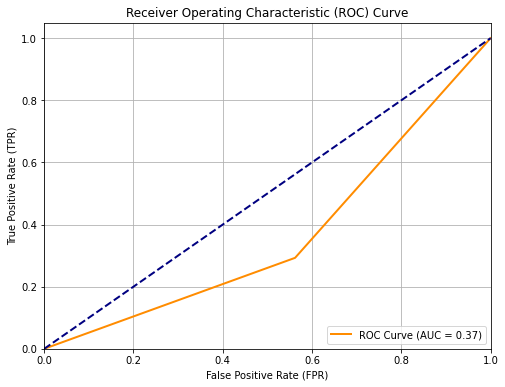

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have calculated probabilities for your binary predictions
# 'y_pred_probs' should be a 1D array or list containing the predicted probabilities
# 'y_test' should be your true binary labels (0s and 1s)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Plot predicted anomalies

In [ ]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

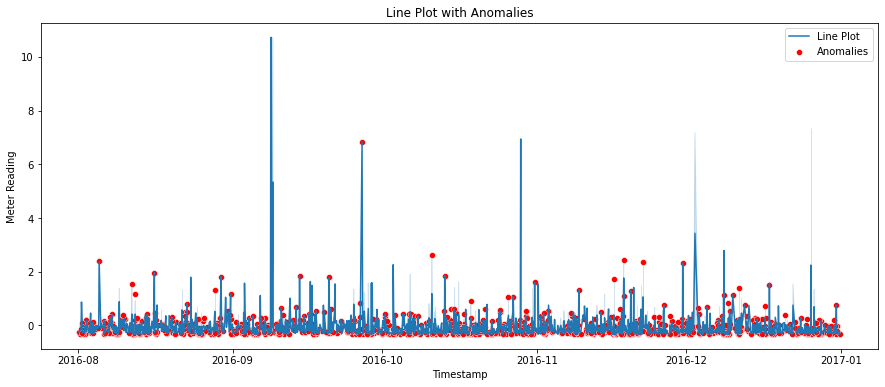

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the line plot using Seaborn
sns.lineplot(data=anomaly_df, x='timestamp', y='meter_reading', label='Line Plot', ax=ax)

# Plot the scatter plot using Seaborn
sns.scatterplot(data=anomalies, x='timestamp', y='meter_reading', color='red', label='Anomalies', marker='o', ax=ax)

# Customize the plot
ax.set_xlabel('Timestamp')
ax.set_ylabel('Meter Reading')
ax.set_title('Line Plot with Anomalies')
ax.legend()

# Show the plot
plt.show()

# Plot TP and FP

In [ ]:
TP = TP.rename(columns={'timestamp_x': 'timestamp'})
TP = TP.rename(columns={'meter_reading_x': 'meter_reading'})

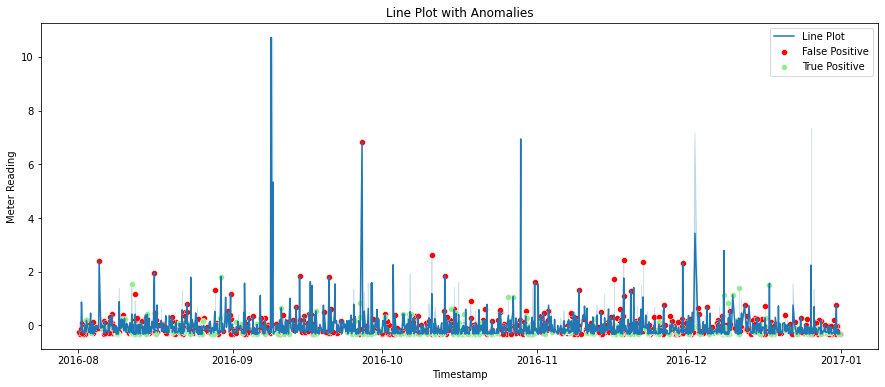

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the line plot using Seaborn
sns.lineplot(data=anomaly_df, x='timestamp', y='meter_reading', label='Line Plot', ax=ax)

# Create DataFrames for True Positives (TP) and False Positives (FP)
tp_df = anomalies.loc[anomalies.index.isin(TP.index)]
fp_df = anomalies.loc[~anomalies.index.isin(TP.index)]


# Plot False Positives in red
sns.scatterplot(data=fp_df, x='timestamp', y='meter_reading', color='red', label='False Positive', marker='o', ax=ax)

# Plot True Positives in yellow
sns.scatterplot(data=tp_df, x='timestamp', y='meter_reading', color='lightgreen', label='True Positive', marker='o', ax=ax)

# Customize the plot
ax.set_xlabel('Timestamp')
ax.set_ylabel('Meter Reading')
ax.set_title('Line Plot with Anomalies')
ax.legend()

# Show the plot
plt.show()

In [ ]:
# Calculate the count and percentage of each unique value in the column
value_counts = merged_data['anomaly_y'].value_counts()
value_percentages = (merged_data['anomaly_y'].value_counts(normalize=True) * 100).round(2)

# Create a new DataFrame to store the results
distribution_df = pd.DataFrame({'Count': value_counts, 'Percentage (%)': value_percentages})

# Sort the DataFrame by count in descending order
distribution_df = distribution_df.reset_index().rename(columns={'index': 'Unique Value'}).sort_values(by='Count', ascending=False)

# Reset the index for the distribution DataFrame
distribution_df = distribution_df.reset_index(drop=True)

# Print or display the distribution
print("Distribution of anomaly:")
print(distribution_df)

Distribution of anomaly:
   Unique Value  Count  Percentage (%)
0         False   1269           56.27
1          True    986           43.73


# Save model

In [ ]:
# Save the trained model to a file
model.save("autoencoder_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("autoencoder_model.h5")

# Deployment

deploy - a dataframe that have column time and meter_reading (to predict whether this dataset consist of anomaly)

In [ ]:
deploy = pd.read_csv("deploy.csv")
deploy.loc[:, 'timestamp'] = pd.to_datetime(deploy['timestamp'])

In [ ]:
import pandas as pd

# Create an empty DataFrame to store the anomalous rows
anomalous_rows_df = pd.DataFrame(columns=deploy.columns)

# Preprocess future data
future_data_seq, _ = to_sequences(deploy[['meter_reading']], deploy['meter_reading'], seq_size)

# Reshape future_data_seq to match the model's input shape
future_data_seq = future_data_seq.reshape((future_data_seq.shape[0], seq_size, 1))

# Use the trained model to predict
predicted_future_data = model.predict(future_data_seq)

# Calculate the Mean Absolute Error (MAE) between input and output for each row
mae_values = np.mean(np.abs(future_data_seq - predicted_future_data), axis=(1, 2))

# Define a threshold for anomaly detection
threshold = best_threshold # Adjust as needed based on your model's performance

# Initialize a flag to track whether any anomalies were detected
anomaly_detected = False

# Check if each row is anomalous and add it to the anomalous_rows_df
for i, mae in enumerate(mae_values):
    if mae > threshold:
        anomalous_rows_df = anomalous_rows_df.append(deploy.iloc[i])
        anomaly_detected = True

# Print a summary message after processing all rows
if anomaly_detected:
    print("Anomalies detected in the data.")
else:
    print("No anomalies detected in the data.")

# Print the DataFrame containing anomalous rows if needed
if anomaly_detected:
    print("Anomalous Rows:")
    display(anomalous_rows_df)

546/546 [==============================] - 5s 10ms/step
Anomalies detected in the data.
Anomalous Rows:


,Unnamed: 0,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,...,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month,day,is_weekend,log_meter_reading
0,882162,903,2016-10-12 00:00:00,582.0,0,9,Education,275793,NaN,0,...,4.08,6.427,4.489,4.548,6.384,6.455,6.426,12,0,6.368187
1,294395,240,2016-07-08 22:00:00,113.62,0,2,Lodging/residential,111304,1964.0,0,...,4.162,4.609,3.979,4.306,4.598,4.62,4.756,8,0,4.741622
2,440899,356,2016-03-19 09:00:00,0.24,0,3,Public services,4336,NaN,0,...,4.078,1.262,3.771,3.854,1.125,1.244,0.825,19,1,0.215111
3,1293431,1141,2016-10-09 06:00:00,9.0,0,13,Parking,20986,NaN,0,...,4.08,2.983,3.623,4.662,2.899,2.918,2.759,9,1,2.302585
4,561320,675,2016-12-20 09:00:00,56.3,0,5,Manufacturing/industrial,3853,1976.0,1,...,4.056,4.071,3.924,2.67,4.194,4.056,4.193,20,0,4.048301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17431,1055400,961,2016-08-10 15:00:00,369.0,0,9,Education,155882,NaN,0,...,4.186,5.769,4.489,4.548,5.839,5.789,5.783,10,0,5.913503
17432,1274005,1128,2016-07-23 13:00:00,65.684,0,13,Office,58703,NaN,0,...,4.162,4.373,4.211,4.662,4.509,4.262,4.324,23,1,4.199965
17433,375565,276,2016-10-07 14:00:00,259.36,0,2,Office,70837,2014.0,0,...,4.08,5.223,4.211,4.306,5.399,5.248,5.288,7,0,5.562065
17434,1703468,1315,2016-08-02 15:00:00,99.0,0,14,Entertainment/public assembly,82789,NaN,0,...,4.186,4.129,3.532,4.71,4.35,4.256,4.393,2,0,4.60517


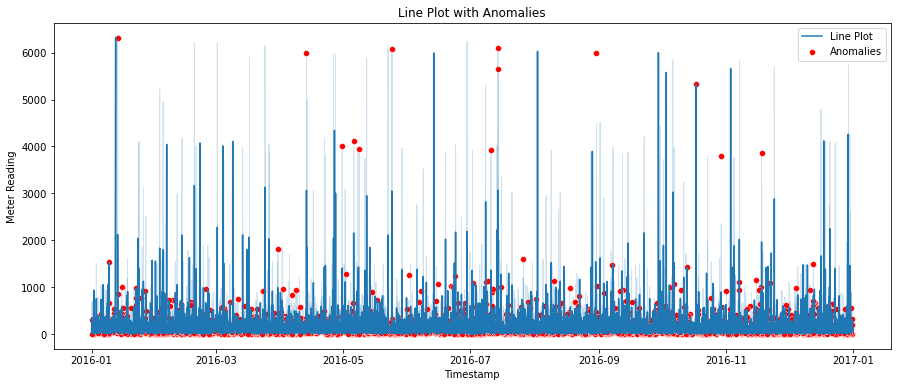

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the line plot using Seaborn
sns.lineplot(data=deploy, x='timestamp', y='meter_reading', label='Line Plot', ax=ax)

# Plot the scatter plot using Seaborn
sns.scatterplot(data=anomalous_rows_df, x='timestamp', y='meter_reading', color='red', label='Anomalies', marker='o', ax=ax)

# Customize the plot
ax.set_xlabel('Timestamp')
ax.set_ylabel('Meter Reading')
ax.set_title('Line Plot with Anomalies')
ax.legend()

# Show the plot
plt.show()

# Grid Search

In [ ]:
param_grid = {
    'lstm_units': [64, 128, 256],
    'num_layers': [1, 2, 3],
    'dropout_rate': [0.2, 0.3, 0.5],
    'learning_rate': [0.01, 0.001, 0.0001]
}

In [ ]:
def create_lstm_model(lstm_units, num_layers, dropout_rate, learning_rate):
    model = Sequential()
    for _ in range(num_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True))
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(trainX.shape[2]))  # Output layer

    # Compile the model with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae')

    return model

In [ ]:
model = KerasRegressor(build_fn=create_lstm_model, verbose=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(trainX, trainY)

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)

#  **4. Histogram-based Outlier Score (HBOS)**
- An unsupervised outlier detection method that leverages histograms to identify anomalies within a dataset. Anomalies are typically data points that fall outside a specified threshold or range of bins, often in the tails of the distribution, making them stand out as potential anomalies in the data.

We will train the HBOS model using the X3 dataset and the random undersampling model that was found to be the best in the previous session.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.hbos import HBOS
from sklearn.metrics import roc_auc_score, classification_report, f1_score, recall_score, precision_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, StratifiedKFold
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message="One or more of the test scores are non-finite")
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")


In [ ]:
X3_ = pd.concat([X3,y],axis=1)

# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X3_, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Random undersampling
X_train_positive = X_train.query("anomaly==1") # do this because there are very few positive samples to start with
X_train_negative = X_train.query("anomaly==0").sample(len(X_train_positive)*1,random_state=50)
X_train_resampled = pd.concat([X_train_positive,X_train_negative])
X_test = X_test.drop(columns=['anomaly'])
X_train = X_train_resampled.drop(columns=['anomaly'])
y_train = X_train_resampled['anomaly']


In [ ]:
# Count the number of positive (1) and negative (0) instances in the training data
num_positive_instances = np.sum(y_train== 1)
num_negative_instances = np.sum(y_train == 0)

print("Number of positive instances in training data:", num_positive_instances)
print("Number of negative instances in training data:", num_negative_instances)

Number of positive instances in training data: 2975
Number of negative instances in training data: 2975


## Hyperparameters in HBOS:
- n_bins: The number of bins used to construct histograms, used to determines the granularity of the histogram.

- alpha: A parameter that controls the amount of smoothing applied to the histograms.

- tolerance: Sets the maximum deviation allowed for data points within bins.

- contamination: The proportion of outliers in the dataset.

Perform hyperparameter tuning for an HBOS model using a grid search approach.

In [ ]:
# Define the hyperparameter search space here
param_grid = {
    'n_bins': [5, 10, 15, 20, 25, 30, 'auto'],  # (default=10)
    'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 0.5],  # (default=0.1)
    'tol': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 0.5],    # (default=0.5)
    'contamination': [0.0001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],  # (default=0.1)
}

# Create the HBOS model
model = HBOS()

# Perform grid search with cross-validation to explore different combinations of hyperparameters
# F1 score to evaluate model performance
grid_search = GridSearchCV(model, param_grid, cv=2, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


In [ ]:
# Train the model with the best hyperparameters
best_model = HBOS(**best_params)
best_model.fit(X_train)

# Use it to make predictions on a testing dataset
# decision_function method calculates anomaly scores for each data point in the test set, indicating how likely each point is to be an outlier.
y_train_pred = best_model.decision_function(X_test)

In [ ]:
# Convert anomaly scores to binary labels
# anomaly score greater than threshold -> outlier(1), else inliers(0).
y_pred_binary = (y_train_pred > threshold).astype(int)
np.unique(y_pred_binary)

array([0])

The model did not identify any outliers in the test data based on the chosen threshold.

In [ ]:
# Evaluate the model using classification report and ROC AUC score
auc = roc_auc_score(y_test, y_train_pred)

print("Best Hyperparameters:", best_model)
print("ROC AUC Score:", "{:.4f}".format(auc))


Best Hyperparameters: HBOS(alpha=0.5, contamination=0.5, n_bins=5, tol=1e-08)
ROC AUC Score: 0.4843


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9781    1.0000    0.9889     34224
           1     0.0000    0.0000    0.0000       766

    accuracy                         0.9781     34990
   macro avg     0.4891    0.5000    0.4945     34990
weighted avg     0.9567    0.9781    0.9673     34990



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classification report shows that the model performs well for the class (0) with high precision (0.9781) and accuracy (0.9781), but it fails to detect any instances of the class (1), resulting in low recall (0.0) and F1-score (0.0) for class 1. To make it better, threshold tuning is crucial. By adjusting the threshold, you can balance precision and recall, potentially improving the model's ability to detect instances of class 1.

In [ ]:
best_model

HBOS(alpha=0.5, contamination=0.5, n_bins=5, tol=1e-08)

## Threshold tuning using best model

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Define a range of thresholds that are distributed between the 85th and 95th percentiles of the anomaly scores.
min_threshold=np.percentile(y_train_pred, 85)
max_threshold=np.percentile(y_train_pred, 95)
thresholds = np.linspace(min_threshold, max_threshold, 20)
thresholds_rounded = np.round(thresholds, 4)
thresholds_rounded

array([-21.8868, -21.7797, -21.6726, -21.5656, -21.4585, -21.3514,
       -21.2444, -21.1373, -21.0302, -20.9232, -20.8161, -20.709 ,
       -20.602 , -20.4949, -20.3878, -20.2807, -20.1737, -20.0666,
       -19.9595, -19.8525])

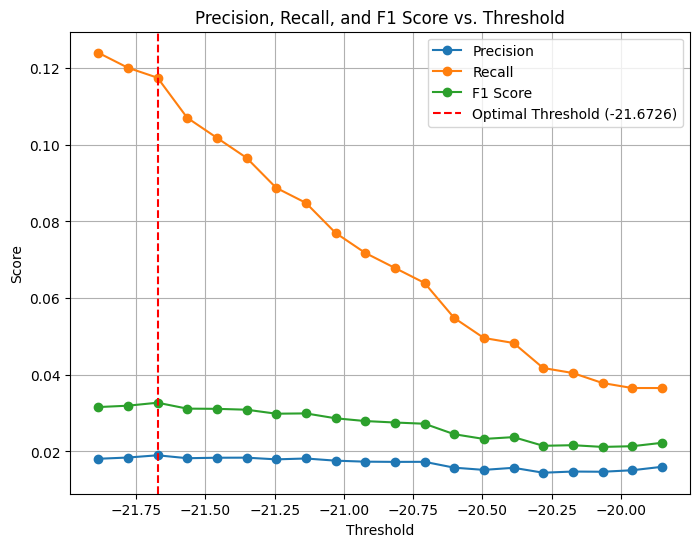

Optimal threshold: -21.6726


In [ ]:
# Initialize lists to store precision and recall values
precisions = []
recalls = []

# Calculate precision and recall for each threshold
for threshold in thresholds_rounded:
    y_pred = (y_train_pred >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Calculate F1-score for each threshold
f1_scores = [f1_score(y_test, (y_train_pred >= threshold).astype(int)) for threshold in thresholds_rounded]

# Find the optimal threshold that has the maximum F1-score
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
# Add a vertical line at the position of the optimal threshold
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.4f})')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal threshold:", format(optimal_threshold, ".4f"))

In [ ]:
# Use the optimal threshold to make predictions
y_pred_optimal = (y_train_pred >= optimal_threshold).astype(int)
np.unique(y_pred_optimal)

array([0, 1])

The model now can identify both inliers(0) and outliers(1) in the data.

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_optimal, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9777    0.8643    0.9175     34224
           1     0.0190    0.1175    0.0327       766

    accuracy                         0.8479     34990
   macro avg     0.4983    0.4909    0.4751     34990
weighted avg     0.9567    0.8479    0.8981     34990



After threshold tuning, the model has improved precision, recall, and F1 score for class 1, with only a slight reduction for class 0, which remains above 0.85. The model's overall accuracy is better than RNN but worse than IF and LOC.

# In conclusion,
- best hyperparameters are: HBOS(alpha=0.5, contamination=0.5, n_bins=5, tol=1e-08)
- best threshold for HBOS is: -21.6726

#  **5. Ensemble model**

In [ ]:
X3_ = pd.concat([X3,y],axis=1)

# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X3_, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Random undersampling
X_train_positive = X_train.query("anomaly==1") # do this because there are very few positive samples to start with
X_train_negative = X_train.query("anomaly==0").sample(len(X_train_positive)*1,random_state=50)
X_train_resampled = pd.concat([X_train_positive,X_train_negative])
X_test = X_test.drop(columns=['anomaly'])
X_train = X_train_resampled.drop(columns=['anomaly'])
y_train = X_train_resampled['anomaly']


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import numpy as np
lof = LocalOutlierFactor(leaf_size=5, metric='euclidean', n_neighbors=5, novelty=True)
lof.fit(X_train)

iso_forest = IsolationForest(bootstrap=True, contamination=0.0001, max_features=3, max_samples=5, n_estimators=3, random_state=42, verbose=1)
iso_forest.fit(X_train)
class CustomEnsembleModel(BaseEstimator, ClassifierMixin):

    def __init__(self, threshold=0.3, lof_weight=0.7, iso_forest_weight=0.3):
        self.threshold = threshold
        self.lof_weight = lof_weight
        self.iso_forest_weight = iso_forest_weight

    def fit(self, X, y):
        # Store the training data and labels for reference
        X, y = check_X_y(X, y)
        self.X_ = X
        self.y_ = y
        return self

    def predict_proba(self, X):
        # Check if the estimator has been fitted
        check_is_fitted(self, attributes=['X_', 'y_'])

        # Obtain anomaly scores from both models

        iso_forest_scores = iso_forest.decision_function(X)
        lof_scores = -lof.decision_function(X)  # Invert LOF scores

        # Combine the anomaly scores using weighted average
        combined_scores = (self.lof_weight * lof_scores + self.iso_forest_weight * iso_forest_scores)

        return combined_scores

    def predict(self, X):

        # Check if the estimator has been fitted
        check_is_fitted(self, attributes=['X_', 'y_'])

        # Obtain anomaly scores from both models
        iso_forest_scores = iso_forest.decision_function(X)
        lof_scores = -lof.decision_function(X)  # Invert LOF scores

        # Combine the anomaly scores using weighted average
        combined_scores = (self.lof_weight * lof_scores + self.iso_forest_weight * iso_forest_scores)

        # Apply the threshold to classify data points as anomalies or not
        y_pred = (combined_scores > self.threshold).astype(int)

        return y_pred


In [ ]:
# Create an instance of your custom ensemble model
ensemble_model = CustomEnsembleModel()

# Fit and use the ensemble model like any other scikit-learn estimator
ensemble_model.fit(X_train, y_train)


CustomEnsembleModel()

In [ ]:
y_pred = ensemble_model.predict_proba(X_test)
y_pred_binary = ensemble_model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
# Apply the threshold to classify data points as anomalies or not
y_pred_binary = (y_pred > ensemble_model.threshold).astype(int)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print and visualize metrics
print(classification_report(y_test, y_pred_binary, digits=4))
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


              precision    recall  f1-score   support

           0     0.9781    0.9513    0.9645     34224
           1     0.0217    0.0483    0.0300       766

    accuracy                         0.9316     34990
   macro avg     0.4999    0.4998    0.4973     34990
weighted avg     0.9572    0.9316    0.9441     34990

ROC AUC Score: 0.4820
Confusion Matrix:
[[32559  1665]
 [  729    37]]


## GridSearchCV to find the best hyperparameters in custom ensemble model:
LOF weight, Isolation Forest weight, and threshold

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import make_scorer, roc_auc_score

#Define the hyperparameter search space
param_grid = {
    'lof_weight': np.linspace(0, 1, 11),       # Range of weight1 values from 0 to 1 with 0.1 increments
    'iso_forest_weight': np.linspace(0, 1, 11),       # Range of weight2 values from 0 to 1 with 0.1 increments
    'threshold': np.linspace(0.1, 1, 10),      # Range of threshold values from 0.1 to 1 with 0.1 increments
}

# Create a parameter grid for GridSearchCV
grid_search = GridSearchCV(estimator=ensemble_model ,param_grid=param_grid,scoring='f1',cv=2, n_jobs=-1)

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and corresponding performance score
best_params = grid_search.best_params_


In [ ]:
# Train the model with the best hyperparameters
best_model = CustomEnsembleModel(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict_proba(X_test)
y_pred_binary = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
# metrics
best_params_formatted = {key: "{:.2f}".format(value) if isinstance(value, float) else value for key, value in best_params.items()}
print("Best Hyperparameters:", best_params_formatted)
print("ROC AUC Score:", "{:.4f}".format(roc_auc))
print(classification_report(y_test, y_pred_binary, digits=4))
print("\nConfusion Matrix:")
print(conf_matrix)

Best Hyperparameters: {'threshold': '0.15', 'lof_weight': '0.60', 'iso_forest_weight': '0.30'}
ROC AUC Score: 0.4822
              precision    recall  f1-score   support

           0     0.9783    0.9362    0.9568     34224
           1     0.0250    0.0731    0.0372       766

    accuracy                         0.9173     34990
   macro avg     0.5017    0.5046    0.4970     34990
weighted avg     0.9574    0.9173    0.9366     34990


Confusion Matrix:
[[32559  1665]
 [  729    37]]


The ROC AUC score and f1 score areincreased after hyperparameter tuning.

The best hyperparameters for the custom ensemble model are:

{'lof_weight': 0.6, 'iso_forest_weight': 0.3, 'threshold': 0.15}

The custom ensemble model will be modified accordingly to be used in model deployment step

## Final ensemble model with best hyperparameters

In [ ]:
lof = LocalOutlierFactor(leaf_size=5, metric='euclidean', n_neighbors=5, novelty=True)
lof.fit(X_train)

iso_forest = IsolationForest(bootstrap=True, contamination=0.0001, max_features=3, max_samples=5, n_estimators=3, random_state=42, verbose=1)
iso_forest.fit(X_train)
class CustomEnsembleModel(BaseEstimator, ClassifierMixin):

    def __init__(self, threshold=0.15, lof_weight=0.6, iso_forest_weight=0.3):
        self.threshold = threshold
        self.lof_weight = lof_weight
        self.iso_forest_weight = iso_forest_weight

    def fit(self, X, y):
        # Store the training data and labels for reference
        X, y = check_X_y(X, y)
        self.X_ = X
        self.y_ = y
        return self

    def predict_proba(self, X):
        # Check if the estimator has been fitted
        check_is_fitted(self, attributes=['X_', 'y_'])

        # Obtain anomaly scores from both models

        iso_forest_scores = iso_forest.decision_function(X)
        lof_scores = -lof.decision_function(X)  # Invert LOF scores

        # Combine the anomaly scores using weighted average
        combined_scores = (self.lof_weight * lof_scores + self.iso_forest_weight * iso_forest_scores)

        return combined_scores

    def predict(self, X):

        # Check if the estimator has been fitted
        check_is_fitted(self, attributes=['X_', 'y_'])

        # Obtain anomaly scores from both models
        iso_forest_scores = iso_forest.decision_function(X)
        lof_scores = -lof.decision_function(X)  # Invert LOF scores

        # Combine the anomaly scores using weighted average
        combined_scores = (self.lof_weight * lof_scores + self.iso_forest_weight * iso_forest_scores)

        # Apply the threshold to classify data points as anomalies or not
        y_pred = (combined_scores > self.threshold).astype(int)

        return y_pred


### Model deployment using ensemble model

In [ ]:
X3_ = pd.concat([X3,y],axis=1)

# Subsample the dataset
X_subsample, _, y_subsample, _ = train_test_split(X3_, y, test_size=(1 - sampling_ratio), random_state=42)

# Split the subsampled data into training and testing sets
X_train, _, y_train,_ = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Random undersampling
X_train_positive = X_train.query("anomaly==1")
X_train_negative = X_train.query("anomaly==0").sample(len(X_train_positive)*1,random_state=50)
X_train_resampled = pd.concat([X_train_positive,X_train_negative])

X_train = X_train_resampled.drop(columns=['anomaly'])
y_train = X_train_resampled['anomaly']

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import numpy as np
lof = LocalOutlierFactor(leaf_size=5, metric='euclidean', n_neighbors=5, novelty=True)
lof.fit(X_train)

iso_forest = IsolationForest(bootstrap=True, contamination=0.0001, max_features=3, max_samples=5, n_estimators=3, random_state=42, verbose=1)
iso_forest.fit(X_train)
class CustomEnsembleModel(BaseEstimator, ClassifierMixin):

    def __init__(self, threshold=0.15, lof_weight=0.6, iso_forest_weight=0.3):
        self.threshold = threshold
        self.lof_weight = lof_weight
        self.iso_forest_weight = iso_forest_weight

    def fit(self, X, y):
        # Store the training data and labels for reference
        X, y = check_X_y(X, y)
        self.X_ = X
        self.y_ = y
        return self

    def predict_proba(self, X):
        # Check if the estimator has been fitted
        check_is_fitted(self, attributes=['X_', 'y_'])

        # Obtain anomaly scores from both models

        iso_forest_scores = iso_forest.decision_function(X)
        lof_scores = -lof.decision_function(X)  # Invert LOF scores

        # Combine the anomaly scores using weighted average
        combined_scores = (self.lof_weight * lof_scores + self.iso_forest_weight * iso_forest_scores)

        return combined_scores

    def predict(self, X):

        # Check if the estimator has been fitted
        check_is_fitted(self, attributes=['X_', 'y_'])

        # Obtain anomaly scores from both models
        iso_forest_scores = iso_forest.decision_function(X)
        lof_scores = -lof.decision_function(X)  # Invert LOF scores

        # Combine the anomaly scores using weighted average
        combined_scores = (self.lof_weight * lof_scores + self.iso_forest_weight * iso_forest_scores)

        # Apply the threshold to classify data points as anomalies or not
        y_pred = (combined_scores > self.threshold).astype(int)

        return y_pred


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [ ]:
ensemble_model = CustomEnsembleModel()

ensemble_model.fit(X_train, y_train)


CustomEnsembleModel()

In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

# Function to switch between pages
def show_page(page):
    notebook.select(page)

# Function to retrieve user input on the third page
def submit():
    building_id = building_id_entry.get()
    meter_reading = meter_reading_entry.get()
    site_id = site_id_var.get()
    primary_use = primary_use_var.get()

    square_feet = square_feet_entry.get()
    year_built = year_built_entry.get()
    floor_count = floor_count_entry.get()
    air_temperature = air_temperature_entry.get()

    cloud_coverage = cloud_coverage_var.get()
    dew_temperature = dew_temperature_entry.get()
    precip_depth_1_hr = precip_depth_1_hr_entry.get()
    sea_level_pressure = sea_level_pressure_entry.get()

    wind_direction = wind_direction_entry.get()
    wind_speed = wind_speed_entry.get()
    hour = hour_entry.get()
    day_to_index = {
        'Monday': 0,
        'Tuesday': 1,
        'Wednesday': 2,
        'Thursday': 3,
        'Friday': 4,
        'Saturday': 5,
        'Sunday': 6
    }
    selected_day = weekday_var.get()
    weekday = day_to_index[selected_day]

    day = day_var.get()
    month = month_var.get()

    gte_building_id = gte_building_id_var.get()
    gte_primary_use = gte_primary_use_var.get()
    gte_site_id = gte_site_id_var.get()
    gte_meter_building_id = gte_meter_building_id_var.get()

    gte_meter_primary_use = gte_meter_primary_use_var.get()
    gte_meter_site_id = gte_meter_site_id_var.get()

    air_temperature_mean_lag7 = air_temperature_mean_lag7_var.get()
    air_temperature_max_lag7 = air_temperature_max_lag7_var.get()
    air_temperature_min_lag7 = air_temperature_min_lag7_var.get()
    air_temperature_std_lag7 = air_temperature_std_lag7_var.get()

    air_temperature_mean_lag73 = air_temperature_mean_lag73_var.get()
    air_temperature_max_lag73 = air_temperature_max_lag73_var.get()
    air_temperature_min_lag73 = air_temperature_min_lag73_var.get()
    air_temperature_std_lag73 = air_temperature_std_lag73_var.get()

    gte_hour = gte_hour_var.get()
    gte_weekday = gte_weekday_var.get()
    gte_month = gte_month_var.get()
    gte_meter_hour = gte_meter_hour_var.get()

    gte_meter_weekday = gte_meter_weekday_var.get()
    gte_meter_month = gte_meter_month_var.get()
    gte_meter_building_id_hour = gte_meter_building_id_hour_var.get()
    gte_meter_building_id_month = gte_meter_building_id_month_var.get()
    gte_meter_building_id_weekday = gte_meter_building_id_weekday_var.get()

    # Retrieve the selected radio button value and map to binary
    is_holiday_non = is_holiday_var.get()
    is_holiday_binary = 1 if is_holiday_non == 'Yes' else 0

    is_weekend_non = is_weekend_var.get()
    is_weekend_binary = 1 if is_weekend_non == 'Yes' else 0

    hour_x = hour_x_var.get()
    hour_y = hour_y_var.get()
    month_x = month_x_var.get()
    month_y = month_y_var.get()

    weekday_x = weekday_x_var.get()
    weekday_y = weekday_y_var.get()

    print("Building ID:", building_id)
    print("Meter Reading:", meter_reading)
    print("Site ID:", site_id)
    print("Primary Use:", primary_use)
    print("Square Feet:", square_feet)
    print("Year Built:", year_built)
    print("Floor Count:", floor_count)
    print("Air Temperature:", air_temperature)
    print("Cloud Coverage:", cloud_coverage)
    print("Dew Temperature:", dew_temperature)
    print("Precip Depth 1 Hr:", precip_depth_1_hr)
    print("Sea Level Pressure:", sea_level_pressure)
    print("Wind Direction:", wind_direction)
    print("Wind Speed:", wind_speed)
    print("Hour:", hour)
    print("Weekday:", weekday)
    print("Day:", day)

    user_input = {
    'building_id': building_id,
    'meter_reading': meter_reading,
    'site_id' : site_id,
    'primary_use' : primary_use,
    'square_feet' : square_feet,
    'year_built'   :year_built,
    'floor_count' : floor_count,
    'air_temperature' :air_temperature,
    'cloud_coverage' : cloud_coverage,
    'dew_temperature'  : dew_temperature,
    'precip_depth_1_hr' :precip_depth_1_hr,
    'sea_level_pressure' :sea_level_pressure,
    'wind_direction' :wind_direction,
    'wind_speed' : wind_speed,
    'hour'  :  hour,
    'weekday' : weekday,
    'month':month,
    'day' : day,
    'is_holiday':is_holiday_binary,
    'is_weekend':is_weekend_binary,
    'gte_building_id':gte_building_id,
    'gte_primary_use':gte_primary_use,
    'gte_site_id':gte_site_id,
    'gte_meter_building_id':gte_meter_building_id,
    'gte_meter_primary_use':gte_meter_primary_use,
    'gte_meter_site_id': gte_meter_site_id,
    'air_temperature_mean_lag7':air_temperature_mean_lag7,
    'air_temperature_max_lag7':air_temperature_max_lag7,
    'air_temperature_min_lag7':air_temperature_min_lag7,
    'air_temperature_std_lag7':air_temperature_std_lag7,
    'air_temperature_mean_lag73':air_temperature_mean_lag73,
    'air_temperature_max_lag73':air_temperature_max_lag73,
    'air_temperature_min_lag73':air_temperature_min_lag73,
    'air_temperature_std_lag73':air_temperature_std_lag73,
    'hour_x':hour_x,
    'hour_y':hour_y,
    'month_x':month_x,
    'month_y':month_y,
    'weekday_x':weekday_x,
    'weekday_y':weekday_y,
    'gte_hour':gte_hour,
    'gte_weekday':gte_weekday,
    'gte_month':gte_month,
    'gte_meter_hour':gte_meter_hour,
    'gte_meter_weekday':gte_meter_weekday,
    'gte_meter_month':gte_meter_month,
    'gte_meter_building_id_hour':gte_meter_building_id_hour,
    'gte_meter_building_id_weekday':gte_meter_building_id_weekday,
    'gte_meter_building_id_month':gte_meter_building_id_month,
    'primary_use_Entertainment/public assembly':0,
    'primary_use_Food sales and service':0,
    'primary_use_Healthcare':0,
    'primary_use_Lodging/residential':0,
    'primary_use_Manufacturing/industrial':0,
    'primary_use_Office':0,
    'primary_use_Other':0,
    'primary_use_Parking':0,
    'primary_use_Public services':0,
    'primary_use_Religious worship':0,
    'primary_use_Services':0
    }

    user_input_mapping = {
    'Entertainment/public assembly': 'primary_use_Entertainment/public assembly',
    'Food sales and service': 'primary_use_Food sales and service',
    'Healthcare': 'primary_use_Healthcare',
    'Lodging/residential': 'primary_use_Lodging/residential',
    'Manufacturing/industrial': 'primary_use_Manufacturing/industrial',
    'Office': 'primary_use_Office',
    'Other': 'primary_use_Other',
    'Parking': 'primary_use_Parking',
    'Public services': 'primary_use_Public services',
    'Religious worship': 'primary_use_Religious worship',
    'Services': 'primary_use_Services'
    }

    # Convert the dictionary into a DataFrame row
    user_input_df = pd.DataFrame([user_input])
    X_test = pd.DataFrame()
    # Append the row to X_test
    X_test = pd.concat([X_test, user_input_df], ignore_index=True)
      # Get the user input for primary_use (replace 'user_input' with the actual user input variable)
    user_input_primary_use = primary_use  # Replace with actual user input

    # Create a new column in X_test based on the user input mapping
    primary_use = user_input_mapping.get(user_input_primary_use)
    if primary_use:
        X_test[primary_use] = 1
    X_test.drop("primary_use", axis=1, inplace=True)
    print(X_test)
    # Convert all columns from object type to float
    X_test = X_test.astype(float)

    y_pred = ensemble_model.predict_proba(X_test)
    y_pred_binary = ensemble_model.predict(X_test)
    print("Predicted Value:", y_pred_binary)

    # Close the tkinter window
    root.destroy()

root = tk.Tk()
root.title("Input Form")

# Create a notebook widget
notebook = ttk.Notebook(root)
notebook.pack(fill="both", expand=True)

# Create and add pages to the notebook
page1 = ttk.Frame(notebook)
page2 = ttk.Frame(notebook)
page3 = ttk.Frame(notebook)
notebook.add(page1, text="Page 1")
notebook.add(page2, text="Page 2")
notebook.add(page3, text="Page 3")

# Page 1
tk.Label(page1, text="Building ID").grid(row=1, column=0)
tk.Label(page1, text="Meter Reading").grid(row=2, column=0)
tk.Label(page1, text="Site ID").grid(row=3, column=0)
tk.Label(page1, text="Primary Use").grid(row=4, column=0)
tk.Label(page1, text="Square Feet").grid(row=5, column=0)
tk.Label(page1, text="Year Built").grid(row=6, column=0)
tk.Label(page1, text="Floor Count").grid(row=7, column=0)

tk.Label(page1, text="GTE building id").grid(row=8, column=0)
tk.Label(page1, text="GTE primary use").grid(row=9, column=0)
tk.Label(page1, text="GTE site id").grid(row=10, column=0)
tk.Label(page1, text="GTE meter building id").grid(row=11, column=0)
tk.Label(page1, text="GTE meter primary use").grid(row=12, column=0)
tk.Label(page1, text="GTE meter site id").grid(row=13, column=0)

# Entry fields - Page 1
building_id_var = tk.StringVar()
building_id_entry = tk.Entry(page1, textvariable=building_id_var)

meter_reading_var = tk.StringVar()
meter_reading_entry = tk.Entry(page1, textvariable=meter_reading_var)

site_id_var = tk.StringVar()
site_id_entry = ttk.Combobox(page1, textvariable=site_id_var, values=[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15])

primary_use_var = tk.StringVar()
primary_use_entry = ttk.Combobox(page1, textvariable=primary_use_var, values=[
    'Education', 'Office', 'Parking', 'Lodging/residential', 'Entertainment/public assembly',
    'Public services', 'Manufacturing/industrial', 'Services', 'Other', 'Healthcare',
    'Food sales and service', 'Religious worship'
])

square_feet_var = tk.StringVar()
square_feet_entry = tk.Entry(page1, textvariable=square_feet_var)

year_built_var = tk.StringVar()
year_built_entry = tk.Entry(page1, textvariable=year_built_var)

floor_count_var = tk.StringVar()
floor_count_entry = tk.Entry(page1, textvariable=floor_count_var)

gte_building_id_var = tk.StringVar()
gte_building_id_entry = tk.Entry(page1, textvariable=gte_building_id_var)

gte_primary_use_var = tk.StringVar()
gte_primary_use_entry = tk.Entry(page1, textvariable=gte_primary_use_var)

gte_site_id_var = tk.StringVar()
gte_site_id_entry = tk.Entry(page1, textvariable=gte_site_id_var)

gte_meter_building_id_var = tk.StringVar()
gte_meter_building_id_entry = tk.Entry(page1, textvariable=gte_meter_building_id_var)

gte_meter_primary_use_var = tk.StringVar()
gte_meter_primary_use_entry = tk.Entry(page1, textvariable=gte_meter_primary_use_var)

gte_meter_site_id_var = tk.StringVar()
gte_meter_site_id_entry = tk.Entry(page1, textvariable=gte_meter_site_id_var)

# Grid placement - Page 1
tk.Label(page1, text="Building Details").grid(row=0, column=0, columnspan=2)
building_id_entry.grid(row=1, column=1)
meter_reading_entry.grid(row=2, column=1)
site_id_entry.grid(row=3, column=1)
primary_use_entry.grid(row=4, column=1)
square_feet_entry.grid(row=5, column=1)
year_built_entry.grid(row=6, column=1)
floor_count_entry.grid(row=7, column=1)

gte_building_id_entry.grid(row=8, column=1)
gte_primary_use_entry.grid(row=9, column=1)
gte_site_id_entry.grid(row=10, column=1)
gte_meter_building_id_entry.grid(row=11, column=1)
gte_meter_primary_use_entry.grid(row=12, column=1)
gte_meter_site_id_entry.grid(row=13, column=1)

# Create a "Next Page" button - Page 1
next_page_button = tk.Button(page1, text="Next Page", command=lambda: show_page(page2))
next_page_button.grid(row=14, columnspan=2)

###############################################################################################################################

# Entry fields - Page 2
air_temperature_var = tk.StringVar()
air_temperature_entry = tk.Entry(page2, textvariable=air_temperature_var)
cloud_coverage_var = tk.StringVar()
cloud_coverage_dropdown = ttk.Combobox(page2, textvariable=cloud_coverage_var, values=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10])
dew_temperature_var = tk.StringVar()
dew_temperature_entry = tk.Entry(page2, textvariable=dew_temperature_var)
precip_depth_1_hr_var = tk.StringVar()
precip_depth_1_hr_entry = tk.Entry(page2, textvariable=precip_depth_1_hr_var)
sea_level_pressure_var = tk.StringVar()
sea_level_pressure_entry = tk.Entry(page2, textvariable=sea_level_pressure_var)
wind_direction_var = tk.StringVar()
wind_direction_entry = tk.Entry(page2, textvariable=wind_direction_var)
wind_speed_var = tk.StringVar()
wind_speed_entry = tk.Entry(page2, textvariable=wind_speed_var)

air_temperature_mean_lag7_var = tk.StringVar()
air_temperature_mean_lag7_entry = tk.Entry(page2, textvariable=air_temperature_mean_lag7_var)

air_temperature_max_lag7_var = tk.StringVar()
air_temperature_max_lag7_entry = tk.Entry(page2, textvariable=air_temperature_max_lag7_var)

air_temperature_min_lag7_var = tk.StringVar()
air_temperature_min_lag7_entry = tk.Entry(page2, textvariable=air_temperature_min_lag7_var)

air_temperature_std_lag7_var = tk.StringVar()
air_temperature_std_lag7_entry = tk.Entry(page2, textvariable=air_temperature_std_lag7_var)

air_temperature_mean_lag73_var = tk.StringVar()
air_temperature_mean_lag73_entry = tk.Entry(page2, textvariable=air_temperature_mean_lag73_var)

air_temperature_max_lag73_var = tk.StringVar()
air_temperature_max_lag73_entry = tk.Entry(page2, textvariable=air_temperature_max_lag73_var)

air_temperature_min_lag73_var = tk.StringVar()
air_temperature_min_lag73_entry = tk.Entry(page2, textvariable=air_temperature_min_lag73_var)

air_temperature_std_lag73_var = tk.StringVar()
air_temperature_std_lag73_entry = tk.Entry(page2, textvariable=air_temperature_std_lag73_var)

# Grid placement - Page 2
tk.Label(page2, text="Weather Details").grid(row=0, column=0, columnspan=2)
tk.Label(page2, text="Air Temperature").grid(row=1, column=0)
tk.Label(page2, text="Cloud Coverage").grid(row=2, column=0)
tk.Label(page2, text="Dew Temperature").grid(row=3, column=0)
tk.Label(page2, text="Precip Depth 1 Hr").grid(row=4, column=0)
tk.Label(page2, text="Sea Level Pressure").grid(row=5, column=0)
tk.Label(page2, text="Wind Direction").grid(row=6, column=0)
tk.Label(page2, text="Wind Speed").grid(row=7, column=0)
tk.Label(page2, text="Air Temperature Mean Lag 7").grid(row=8, column=0)
tk.Label(page2, text="Air Temperature Max Lag 7").grid(row=9, column=0)
tk.Label(page2, text="Air Temperature Min Lag 7").grid(row=10, column=0)
tk.Label(page2, text="Air Temperature Std Lag 7").grid(row=11, column=0)
tk.Label(page2, text="Air Temperature Mean Lag 73").grid(row=12, column=0)
tk.Label(page2, text="Air Temperature Max Lag 73").grid(row=13, column=0)
tk.Label(page2, text="Air Temperature Min Lag 73").grid(row=14, column=0)
tk.Label(page2, text="Air Temperature Std Lag 73").grid(row=15, column=0)

air_temperature_entry.grid(row=1, column=1)
cloud_coverage_dropdown.grid(row=2, column=1)
dew_temperature_entry.grid(row=3, column=1)
precip_depth_1_hr_entry.grid(row=4, column=1)
sea_level_pressure_entry.grid(row=5, column=1)
wind_direction_entry.grid(row=6, column=1)
wind_speed_entry.grid(row=7, column=1)

air_temperature_mean_lag7_entry.grid(row=8, column=1)
air_temperature_max_lag7_entry.grid(row=9, column=1)
air_temperature_min_lag7_entry.grid(row=10, column=1)
air_temperature_std_lag7_entry.grid(row=11, column=1)

air_temperature_mean_lag73_entry.grid(row=12, column=1)
air_temperature_max_lag73_entry.grid(row=13, column=1)
air_temperature_min_lag73_entry.grid(row=14, column=1)
air_temperature_std_lag73_entry.grid(row=15, column=1)


# Create a "Next Page" button - Page 2
next_page_button = tk.Button(page2, text="Next Page", command=lambda: show_page(page3))
next_page_button.grid(row=17, columnspan=2)

################################################################################################################################
# Entry fields - Page 3
hour_var = tk.StringVar()
hour_entry = tk.Entry(page3, textvariable=hour_var)

weekday_var = tk.StringVar()
weekday_dropdown = ttk.Combobox(page3, textvariable=weekday_var, values=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
day_var = tk.StringVar()
day_entry = tk.Entry(page3, textvariable=day_var)

month_var = tk.StringVar()
month_entry = tk.Entry(page3, textvariable=month_var)

is_holiday_var = tk.StringVar()
is_holiday_var.set("No")  # Set a default value
is_holiday_radio1 = tk.Radiobutton(page3, text="No", variable=is_holiday_var, value="No")
is_holiday_radio2 = tk.Radiobutton(page3, text="Yes", variable=is_holiday_var, value="Yes")

is_weekend_var = tk.StringVar()
is_weekend_var.set("No")  # Set a default value
is_weekend_radio1 = tk.Radiobutton(page3, text="No", variable=is_weekend_var, value="No")
is_weekend_radio2 = tk.Radiobutton(page3, text="Yes", variable=is_weekend_var, value="Yes")

hour_x_var = tk.StringVar()
hour_x_entry = tk.Entry(page3, textvariable=hour_x_var)

hour_y_var = tk.StringVar()
hour_y_entry = tk.Entry(page3, textvariable=hour_y_var)

month_x_var = tk.StringVar()
month_x_entry = tk.Entry(page3, textvariable=month_x_var)

month_y_var = tk.StringVar()
month_y_entry = tk.Entry(page3, textvariable=month_y_var)

weekday_x_var = tk.StringVar()
weekday_x_entry = tk.Entry(page3, textvariable=weekday_x_var)

weekday_y_var = tk.StringVar()
weekday_y_entry = tk.Entry(page3, textvariable=weekday_y_var)

gte_hour_var = tk.StringVar()
gte_hour_entry = tk.Entry(page3, textvariable=gte_hour_var)

gte_weekday_var = tk.StringVar()
gte_weekday_entry = tk.Entry(page3, textvariable=gte_weekday_var)

gte_month_var = tk.StringVar()
gte_month_entry = tk.Entry(page3, textvariable=gte_month_var)

gte_meter_hour_var = tk.StringVar()
gte_meter_hour_entry = tk.Entry(page3, textvariable=gte_meter_hour_var)

gte_meter_weekday_var = tk.StringVar()
gte_meter_weekday_entry = tk.Entry(page3, textvariable=gte_meter_weekday_var)

gte_meter_month_var = tk.StringVar()
gte_meter_month_entry = tk.Entry(page3, textvariable=gte_meter_month_var)

gte_meter_building_id_hour_var = tk.StringVar()
gte_meter_building_id_hour_entry = tk.Entry(page3, textvariable=gte_meter_building_id_hour_var)

gte_meter_building_id_weekday_var = tk.StringVar()
gte_meter_building_id_weekday_entry = tk.Entry(page3, textvariable=gte_meter_building_id_weekday_var)

gte_meter_building_id_month_var = tk.StringVar()
gte_meter_building_id_month_entry = tk.Entry(page3, textvariable=gte_meter_building_id_month_var)


# Grid placement - Page 3
tk.Label(page3, text="Time Details").grid(row=0, column=0, columnspan=2)
tk.Label(page3, text="Day (1-31)").grid(row=1, column=0)
tk.Label(page3, text="Hour (0-23)").grid(row=2, column=0)
tk.Label(page3, text="Day Of The Week").grid(row=3, column=0)
tk.Label(page3, text="Month").grid(row=4, column=0)
tk.Label(page3, text="Holiday?").grid(row=5, column=0)

tk.Label(page3, text="Weekend?").grid(row=7, column=0)

tk.Label(page3, text="Hour x").grid(row=9, column=0)
tk.Label(page3, text="Hour y").grid(row=10, column=0)
tk.Label(page3, text="Month x").grid(row=11, column=0)
tk.Label(page3, text="Month y").grid(row=12, column=0)
tk.Label(page3, text="Weekday x").grid(row=13, column=0)
tk.Label(page3, text="Weekday y").grid(row=14, column=0)

tk.Label(page3, text="GTE hour").grid(row=15, column=0)
tk.Label(page3, text="GTE weekday").grid(row=16, column=0)
tk.Label(page3, text="GTE month").grid(row=17, column=0)
tk.Label(page3, text="GTE meter hour").grid(row=18, column=0)
tk.Label(page3, text="GTE meter weekday").grid(row=19, column=0)
tk.Label(page3, text="GTE meter month").grid(row=20, column=0)
tk.Label(page3, text="GTE meter building id hour").grid(row=21, column=0)
tk.Label(page3, text="GTE meter building id weekday").grid(row=22, column=0)
tk.Label(page3, text="GTE meter building id month").grid(row=23, column=0)

day_entry.grid(row=1, column=1)
hour_entry.grid(row=2, column=1)
weekday_dropdown.grid(row=3, column=1)
month_entry.grid(row=4, column=1)
is_holiday_radio1.grid(row=5, column=1)
is_holiday_radio2.grid(row=6, column=1)

is_weekend_radio1.grid(row=7, column=1)
is_weekend_radio2.grid(row=8, column=1)

hour_x_entry.grid(row=9, column=1)
hour_y_entry.grid(row=10, column=1)
month_x_entry.grid(row=11, column=1)
month_y_entry.grid(row=12, column=1)
weekday_x_entry.grid(row=13, column=1)
weekday_y_entry.grid(row=14, column=1)

gte_hour_entry.grid(row=15, column=1)
gte_weekday_entry.grid(row=16, column=1)
gte_month_entry.grid(row=17, column=1)
gte_meter_hour_entry.grid(row=18, column=1)
gte_meter_weekday_entry.grid(row=19, column=1)
gte_meter_month_entry.grid(row=20, column=1)
gte_meter_building_id_hour_entry.grid(row=21, column=1)
gte_meter_building_id_weekday_entry.grid(row=22, column=1)
gte_meter_building_id_month_entry.grid(row=23, column=1)

# Create a "Submit" button - Page 3
get_input_button = tk.Button(page3, text="Submit", command=submit)
get_input_button.grid(row=24, columnspan=2)

root.mainloop()


Building ID: 21.0943
Meter Reading: 21.0943
Site ID: 1
Primary Use: Office
Square Feet: 21.0943
Year Built: 21.0943
Floor Count: 21.0943
Air Temperature: 21.0943
Cloud Coverage: 1
Dew Temperature: 21.0943
Precip Depth 1 Hr: 21.0943
Sea Level Pressure: 21.0943
Wind Direction: 21.0943
Wind Speed: 21.0943
Hour: 21.0943
Weekday: 1
Day: 21.0943
  building_id meter_reading site_id square_feet year_built floor_count  \
0     21.0943       21.0943       1     21.0943    21.0943     21.0943   

  air_temperature cloud_coverage dew_temperature precip_depth_1_hr  ...  \
0         21.0943              1         21.0943           21.0943  ...   

  primary_use_Food sales and service primary_use_Healthcare  \
0                                  0                      0   

  primary_use_Lodging/residential primary_use_Manufacturing/industrial  \
0                               0                                    0   

   primary_use_Office primary_use_Other primary_use_Parking  \
0                  

C:\Users\sharr\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\sharr\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
